# Diabetes Analysis

### Author: Ly Duc Trung

### Link: https://github.com/DucTrung1802/DS/blob/main/GLM_Report/diabetes_analysis_upgrade.ipynb

### Dataset Link: https://www.archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators

## 0. Install and import libraries

### 0.1. Check R version

In [208]:
R.Version()

$platform
[1] "x86_64-w64-mingw32"

$arch
[1] "x86_64"

$os
[1] "mingw32"

$system
[1] "x86_64, mingw32"

$status
[1] ""

$major
[1] "4"

$minor
[1] "0.5"

$year
[1] "2021"

$month
[1] "03"

$day
[1] "31"

$`svn rev`
[1] "80133"

$language
[1] "R"

$version.string
[1] "R version 4.0.5 (2021-03-31)"

$nickname
[1] "Shake and Throw"

### 0.2. Install

In [209]:
# INSTALL THESE PACKAGES IN CONDA TERMINAL


### 0.3. Import

In [340]:
library(ggplot2)
library(ROSE)
library(psych)
library(DescTools)
library(BSDA)
library(gmodels)
library(rcompanion)
library(pcaPP)
library(corrplot)
library(caret)
library(MASS)
library(pROC)
library(DHARMa)

In [211]:
### 0.4. Constants

In [212]:
SEED = 123
MAIN_COLOR = "#1155cc"

## 1. Import Data

In [213]:
input_data = read.csv("diabetes_full_data.csv")

In [214]:
df = data.frame(input_data)

In [215]:
df

X,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,⋯,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,1,1,1,40,1,0,0,0,0,⋯,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,⋯,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,⋯,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,⋯,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,⋯,0,2,3,0,0,0,11,5,4,0
5,1,1,1,25,1,0,0,1,1,⋯,0,2,0,2,0,1,10,6,8,0
6,1,0,1,30,1,0,0,0,0,⋯,0,3,0,14,0,0,9,6,7,0
7,1,1,1,25,1,0,0,1,0,⋯,0,3,0,0,1,0,11,4,4,0
8,1,1,1,30,1,0,1,0,1,⋯,0,5,30,30,1,0,9,5,1,1


In [216]:
str(df)

'data.frame':	253680 obs. of  23 variables:
 $ X                   : int  0 1 2 3 4 5 6 7 8 9 ...
 $ HighBP              : int  1 0 1 1 1 1 1 1 1 0 ...
 $ HighChol            : int  1 0 1 0 1 1 0 1 1 0 ...
 $ CholCheck           : int  1 0 1 1 1 1 1 1 1 1 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ Smoker              : int  1 1 0 0 0 1 1 1 1 0 ...
 $ Stroke              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: int  0 0 0 0 0 0 0 0 1 0 ...
 $ PhysActivity        : int  0 1 0 1 1 1 0 1 0 0 ...
 $ Fruits              : int  0 0 1 1 1 1 0 0 1 0 ...
 $ Veggies             : int  1 0 0 1 1 1 0 1 1 1 ...
 $ HvyAlcoholConsump   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : int  1 0 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : int  0 1 1 0 0 0 0 0 0 0 ...
 $ GenHlth             : int  5 3 5 2 2 2 3 3 5 2 ...
 $ MentHlth            : int  18 0 30 0 3 0 0 0 30 0 ...
 $ PhysHlth            : int  15 0 30 0 0 2 14 0 30 0 ...
 $ DiffWalk          

## 2. Data Preprocessing

### 2.1. Standardize column names

In [217]:
colnames(df)

[1] "X"                    "HighBP"               "HighChol"            
 [4] "CholCheck"            "BMI"                  "Smoker"              
 [7] "Stroke"               "HeartDiseaseorAttack" "PhysActivity"        
[10] "Fruits"               "Veggies"              "HvyAlcoholConsump"   
[13] "AnyHealthcare"        "NoDocbcCost"          "GenHlth"             
[16] "MentHlth"             "PhysHlth"             "DiffWalk"            
[19] "Sex"                  "Age"                  "Education"           
[22] "Income"               "Diabetes_binary"

In [218]:
# COMMENT: remove column "X"
if ("X" %in% colnames(df))
{
    df = df[, !colnames(df) == "X"]
}

In [219]:
str(df)

'data.frame':	253680 obs. of  22 variables:
 $ HighBP              : int  1 0 1 1 1 1 1 1 1 0 ...
 $ HighChol            : int  1 0 1 0 1 1 0 1 1 0 ...
 $ CholCheck           : int  1 0 1 1 1 1 1 1 1 1 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ Smoker              : int  1 1 0 0 0 1 1 1 1 0 ...
 $ Stroke              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: int  0 0 0 0 0 0 0 0 1 0 ...
 $ PhysActivity        : int  0 1 0 1 1 1 0 1 0 0 ...
 $ Fruits              : int  0 0 1 1 1 1 0 0 1 0 ...
 $ Veggies             : int  1 0 0 1 1 1 0 1 1 1 ...
 $ HvyAlcoholConsump   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : int  1 0 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : int  0 1 1 0 0 0 0 0 0 0 ...
 $ GenHlth             : int  5 3 5 2 2 2 3 3 5 2 ...
 $ MentHlth            : int  18 0 30 0 3 0 0 0 30 0 ...
 $ PhysHlth            : int  15 0 30 0 0 2 14 0 30 0 ...
 $ DiffWalk            : int  1 0 1 0 0 0 0 1 1 0 ...
 $ Sex               

### 2.2. Mismatched data types

In [220]:
str(df)

'data.frame':	253680 obs. of  22 variables:
 $ HighBP              : int  1 0 1 1 1 1 1 1 1 0 ...
 $ HighChol            : int  1 0 1 0 1 1 0 1 1 0 ...
 $ CholCheck           : int  1 0 1 1 1 1 1 1 1 1 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ Smoker              : int  1 1 0 0 0 1 1 1 1 0 ...
 $ Stroke              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: int  0 0 0 0 0 0 0 0 1 0 ...
 $ PhysActivity        : int  0 1 0 1 1 1 0 1 0 0 ...
 $ Fruits              : int  0 0 1 1 1 1 0 0 1 0 ...
 $ Veggies             : int  1 0 0 1 1 1 0 1 1 1 ...
 $ HvyAlcoholConsump   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : int  1 0 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : int  0 1 1 0 0 0 0 0 0 0 ...
 $ GenHlth             : int  5 3 5 2 2 2 3 3 5 2 ...
 $ MentHlth            : int  18 0 30 0 3 0 0 0 30 0 ...
 $ PhysHlth            : int  15 0 30 0 0 2 14 0 30 0 ...
 $ DiffWalk            : int  1 0 1 0 0 0 0 1 1 0 ...
 $ Sex               

In [221]:
# COMMENT
# All columns have correct data type

### 2.3. Mixed data values

In [222]:
# COMMENT
# Example: (female, woman, man, male) => (male, female)

In [223]:
# COMMENT
# This dataset contains only number data => No mixed data values

### 2.4. Missing data

#### 2.4.1 Null data

In [224]:
sum(is.na(df))

[1] 0

In [225]:
# COMMENT
# This dataset has no missing values

#### 2.4.2 Missing data in specific columns

In [226]:
# COMMENT
# We see that in column "Age", the value could have value of 14 
# which is Don’t know / Refused / Missing (_AGEG5YR - BRFSS)

In [227]:
nrow(subset(df, Age == 14))

[1] 0

In [228]:
# COMMENT
# The dataset has no missing data.

## 3. Exploratory data analysis (EDA)

In [229]:
plot_stack_bar_2x2 = function(table_2x2)
{
    barplot(table_2x2, beside = TRUE, col = c("green", "red"))
    legend("top", legend = rownames(table_2x2), fill = c("green", "red"))
}

In [230]:
str(df)

'data.frame':	253680 obs. of  22 variables:
 $ HighBP              : int  1 0 1 1 1 1 1 1 1 0 ...
 $ HighChol            : int  1 0 1 0 1 1 0 1 1 0 ...
 $ CholCheck           : int  1 0 1 1 1 1 1 1 1 1 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ Smoker              : int  1 1 0 0 0 1 1 1 1 0 ...
 $ Stroke              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: int  0 0 0 0 0 0 0 0 1 0 ...
 $ PhysActivity        : int  0 1 0 1 1 1 0 1 0 0 ...
 $ Fruits              : int  0 0 1 1 1 1 0 0 1 0 ...
 $ Veggies             : int  1 0 0 1 1 1 0 1 1 1 ...
 $ HvyAlcoholConsump   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : int  1 0 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : int  0 1 1 0 0 0 0 0 0 0 ...
 $ GenHlth             : int  5 3 5 2 2 2 3 3 5 2 ...
 $ MentHlth            : int  18 0 30 0 3 0 0 0 30 0 ...
 $ PhysHlth            : int  15 0 30 0 0 2 14 0 30 0 ...
 $ DiffWalk            : int  1 0 1 0 0 0 0 1 1 0 ...
 $ Sex               

### 3.1. Response variable analysis

In [231]:
plot_binary_distribution = function(dataframe, response_col, title)
{
    # Creating a table of counts for each category in the response column
    response_table <- table(dataframe[, response_col])
    
    # Converting the table into a data frame
    response_df <- as.data.frame(response_table)
    
    # Renaming the column
    colnames(response_df) <- c("Response", "Count")
    
    # Calculate percentages
    response_df$Percent <- response_df$Count / sum(response_df$Count) * 100
    
    # Creating a pie chart using ggplot2
    pie_chart <- ggplot(response_df, aes(x = "", y = Count, fill = Response)) +
      geom_bar(stat = "identity", width = 1) +
      coord_polar("y", start = 0) +
      scale_fill_manual(values = c("green", "red")) + 
      labs(title = title) +
      theme_void() +
      theme(legend.position = "bottom", 
            plot.title = element_text(hjust = 0.5, size = 30),  # Adjust title size here
            legend.text = element_text(size = 20)) +            # Adjust legend text size here
      geom_text(aes(label = paste0(round(Percent, 1), "%")), 
                position = position_stack(vjust = 0.5),
                size = 7) + # Adjust label size here
      guides(fill = guide_legend(title = response_col, title.position = "top", title.theme = element_text(size = 15))) # Adjust legend title size here
    
    # Displaying the pie chart
    print(pie_chart)
}

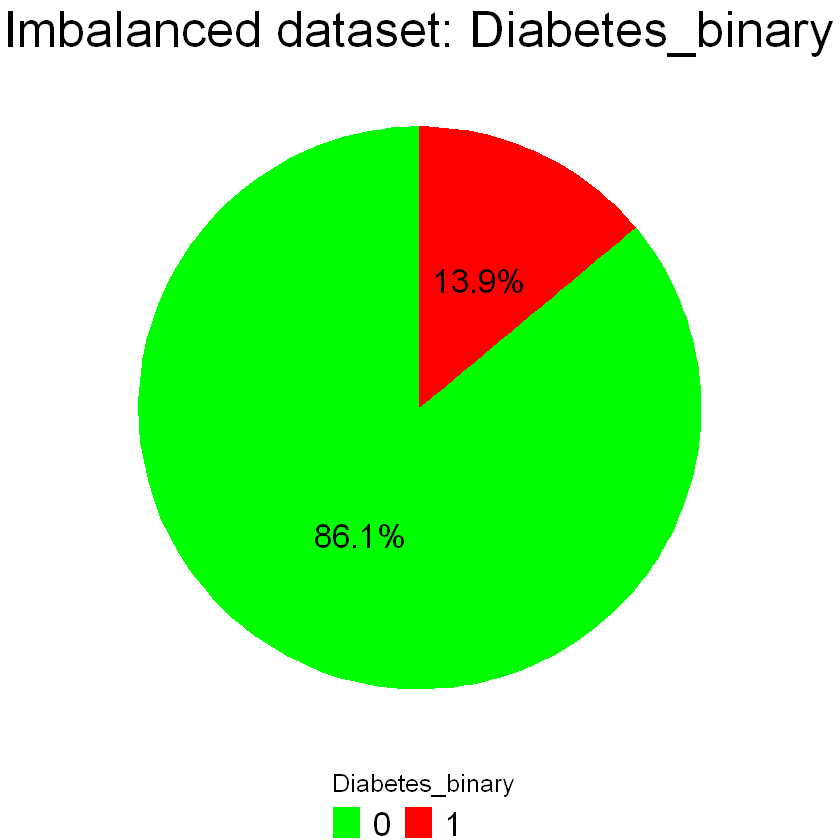

In [232]:
plot_binary_distribution(df, "Diabetes_binary", "Imbalanced dataset: Diabetes_binary")

In [233]:
# COMMENT
# The dataset is imbalanced
# => Apply oversampling method

### 3.2. Dataset oversampling

In [234]:
table(df$Diabetes_binary)


     0      1 
218334  35346 

In [235]:
balanced_df <- ovun.sample(Diabetes_binary ~  ., data = df,
                                  p = 0.5, seed = SEED, 
                                  method = "over")$data

In [236]:
table(balanced_df$Diabetes_binary)


     0      1 
218334 218266 

In [237]:
balanced_df

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,⋯,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,1,1,40,1,0,0,0,0,1,⋯,0,5,18,15,1,0,9,4,3,0
2,0,0,0,25,1,0,0,1,0,0,⋯,1,3,0,0,0,0,7,6,1,0
3,1,1,1,28,0,0,0,0,1,0,⋯,1,5,30,30,1,0,9,4,8,0
4,1,0,1,27,0,0,0,1,1,1,⋯,0,2,0,0,0,0,11,3,6,0
5,1,1,1,24,0,0,0,1,1,1,⋯,0,2,3,0,0,0,11,5,4,0
6,1,1,1,25,1,0,0,1,1,1,⋯,0,2,0,2,0,1,10,6,8,0
7,1,0,1,30,1,0,0,0,0,0,⋯,0,3,0,14,0,0,9,6,7,0
8,1,1,1,25,1,0,0,1,0,1,⋯,0,3,0,0,1,0,11,4,4,0
9,0,0,1,24,0,0,0,0,0,1,⋯,0,2,0,0,0,1,8,4,3,0


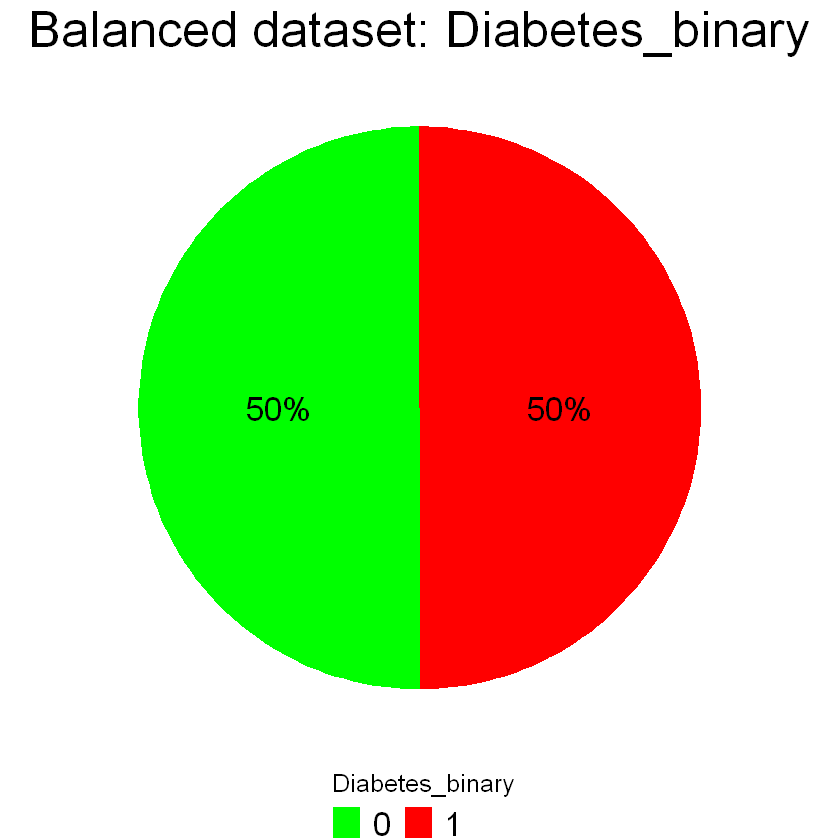

In [238]:
plot_binary_distribution(balanced_df, "Diabetes_binary", "Balanced dataset: Diabetes_binary")

In [239]:
with_diabetes_rows = which(balanced_df$Diabetes_binary == 1)
no_diabetes_rows = which(balanced_df$Diabetes_binary == 0)

### 3.3. Detect Numerical, Binary, Ordinal variables

In [240]:
str(balanced_df)

'data.frame':	436600 obs. of  22 variables:
 $ HighBP              : int  1 0 1 1 1 1 1 1 0 1 ...
 $ HighChol            : int  1 0 1 0 1 1 0 1 0 1 ...
 $ CholCheck           : int  1 0 1 1 1 1 1 1 1 1 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 24 34 ...
 $ Smoker              : int  1 1 0 0 0 1 1 1 0 1 ...
 $ Stroke              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: int  0 0 0 0 0 0 0 0 0 0 ...
 $ PhysActivity        : int  0 1 0 1 1 1 0 1 0 0 ...
 $ Fruits              : int  0 0 1 1 1 1 0 0 0 1 ...
 $ Veggies             : int  1 0 0 1 1 1 0 1 1 1 ...
 $ HvyAlcoholConsump   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : int  1 0 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : int  0 1 1 0 0 0 0 0 0 0 ...
 $ GenHlth             : int  5 3 5 2 2 2 3 3 2 3 ...
 $ MentHlth            : int  18 0 30 0 3 0 0 0 0 0 ...
 $ PhysHlth            : int  15 0 30 0 0 2 14 0 0 30 ...
 $ DiffWalk            : int  1 0 1 0 0 0 0 1 0 1 ...
 $ Sex                

In [241]:
numerical_cols = c("BMI", "MentHlth", "PhysHlth")
binary_cols = c("HighBP", "HighChol", "CholCheck", "Smoker", "Stroke",
               "HeartDiseaseorAttack", "PhysActivity", "Fruits", "Veggies",
               "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost",
               "DiffWalk", "Sex")
ordinal_cols = c("GenHlth", "Age", "Education", "Income")
response_col = "Diabetes_binary"

display_matrix = matrix(c(length(numerical_cols), length(binary_cols), length(ordinal_cols)), nrow = 3)
rownames(display_matrix) = c("numerical_cols", "binary_cols", "ordinal_cols")
colnames(display_matrix) = "Number of variable"
display_matrix

,Number of variable
numerical_cols,3
binary_cols,14
ordinal_cols,4


### 3.4. Data factorization

In [242]:
str(balanced_df)

'data.frame':	436600 obs. of  22 variables:
 $ HighBP              : int  1 0 1 1 1 1 1 1 0 1 ...
 $ HighChol            : int  1 0 1 0 1 1 0 1 0 1 ...
 $ CholCheck           : int  1 0 1 1 1 1 1 1 1 1 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 24 34 ...
 $ Smoker              : int  1 1 0 0 0 1 1 1 0 1 ...
 $ Stroke              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: int  0 0 0 0 0 0 0 0 0 0 ...
 $ PhysActivity        : int  0 1 0 1 1 1 0 1 0 0 ...
 $ Fruits              : int  0 0 1 1 1 1 0 0 0 1 ...
 $ Veggies             : int  1 0 0 1 1 1 0 1 1 1 ...
 $ HvyAlcoholConsump   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : int  1 0 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : int  0 1 1 0 0 0 0 0 0 0 ...
 $ GenHlth             : int  5 3 5 2 2 2 3 3 2 3 ...
 $ MentHlth            : int  18 0 30 0 3 0 0 0 0 0 ...
 $ PhysHlth            : int  15 0 30 0 0 2 14 0 0 30 ...
 $ DiffWalk            : int  1 0 1 0 0 0 0 1 0 1 ...
 $ Sex                

In [243]:
for (col in binary_cols)
{
    balanced_df[, col] = factor(balanced_df[, col])
}

for (col in ordinal_cols)
{
    balanced_df[, col] = factor(balanced_df[, col], ordered = T)
}

balanced_df[, response_col] = factor(balanced_df[, response_col])

In [244]:
str(balanced_df)

'data.frame':	436600 obs. of  22 variables:
 $ HighBP              : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 1 2 ...
 $ HighChol            : Factor w/ 2 levels "0","1": 2 1 2 1 2 2 1 2 1 2 ...
 $ CholCheck           : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 2 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 24 34 ...
 $ Smoker              : Factor w/ 2 levels "0","1": 2 2 1 1 1 2 2 2 1 2 ...
 $ Stroke              : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ HeartDiseaseorAttack: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ PhysActivity        : Factor w/ 2 levels "0","1": 1 2 1 2 2 2 1 2 1 1 ...
 $ Fruits              : Factor w/ 2 levels "0","1": 1 1 2 2 2 2 1 1 1 2 ...
 $ Veggies             : Factor w/ 2 levels "0","1": 2 1 1 2 2 2 1 2 2 2 ...
 $ HvyAlcoholConsump   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ AnyHealthcare       : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 2 ...
 $ NoDocbcCost         : Factor w/ 2 levels "

### 3.4. Numerical variables analysis

In [245]:
# Numerical variables (3): BMI, MentHlth, PhysHlth

In [246]:
psych::describeBy(balanced_df[,numerical_cols], balanced_df[,response_col])


 Descriptive statistics by group 
group: 0
         vars      n  mean   sd median trimmed  mad min max range skew kurtosis
BMI         1 218334 27.81 6.29     27   27.15 4.45  12  98    86 2.33    13.62
MentHlth    2 218334  2.98 7.11      0    0.94 0.00   0  30    30 2.86     7.37
PhysHlth    3 218334  3.64 8.06      0    1.30 0.00   0  30    30 2.50     5.00
           se
BMI      0.01
MentHlth 0.02
PhysHlth 0.02
------------------------------------------------------------ 
group: 1
         vars      n  mean    sd median trimmed  mad min max range skew
BMI         1 218266 31.94  7.36     31   31.23 5.93  13  98    85 1.54
MentHlth    2 218266  4.45  8.93      0    2.01 0.00   0  30    30 2.07
PhysHlth    3 218266  7.94 11.29      1    6.17 1.48   0  30    30 1.15
         kurtosis   se
BMI          5.86 0.02
MentHlth     2.90 0.02
PhysHlth    -0.33 0.02

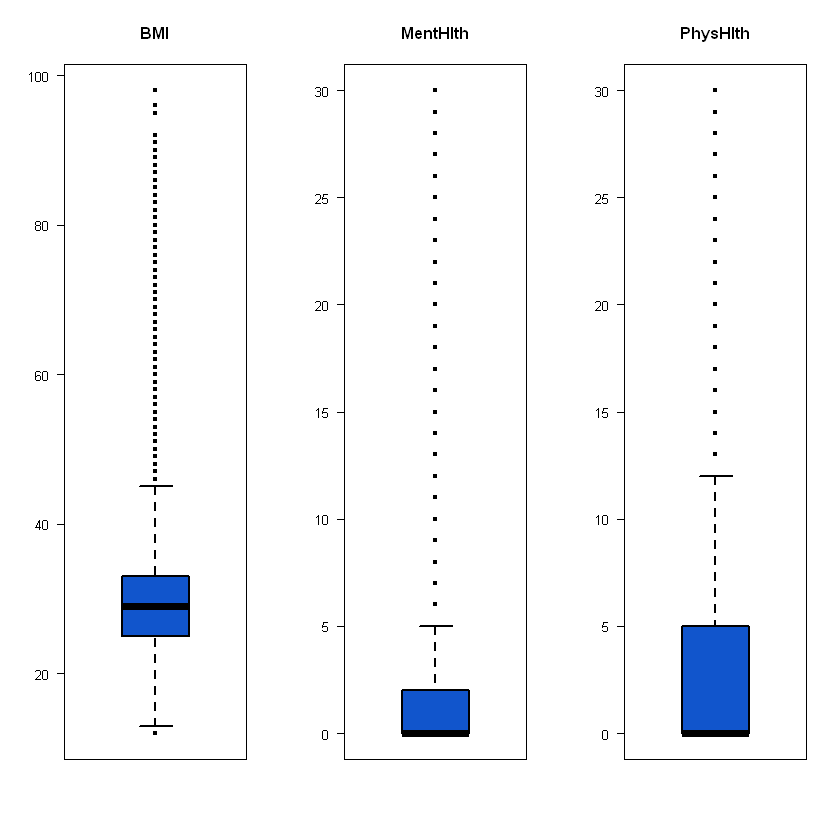

In [247]:
par(mfrow = c(1,3))
boxplot(balanced_df$BMI, main = "BMI", col = MAIN_COLOR, las = 1, lwd = 2)
boxplot(balanced_df$MentHlth, main = "MentHlth", col = MAIN_COLOR, las = 1, lwd = 2)
boxplot(balanced_df$PhysHlth, main = "PhysHlth", col = MAIN_COLOR, las = 1, lwd = 2)

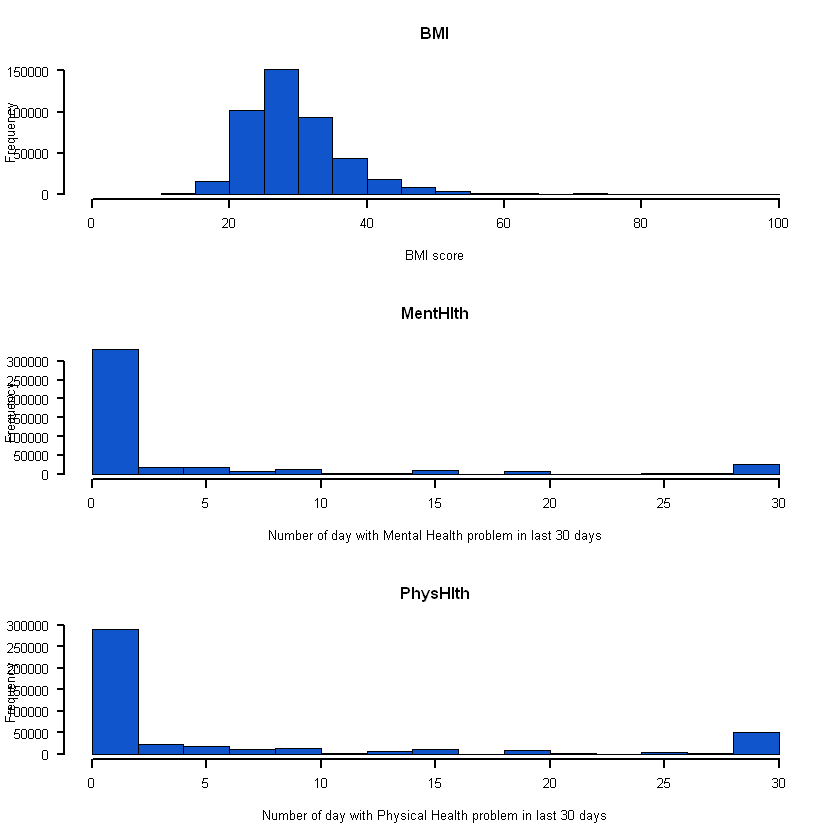

In [248]:
par(mfrow = c(3,1))
hist(balanced_df$BMI, main = "BMI", xlab = "BMI score", col = MAIN_COLOR, las = 1, lwd = 2, xlim = c(0, 100))
hist(balanced_df$MentHlth, main = "MentHlth", xlab = "Number of day with Mental Health problem in last 30 days",
    col = MAIN_COLOR, las = 1, lwd = 2)
hist(balanced_df$PhysHlth, main = "PhysHlth", xlab = "Number of day with Physical Health problem in last 30 days",
    col = MAIN_COLOR, las = 1, lwd = 2)

#### 3.4.1. BMI

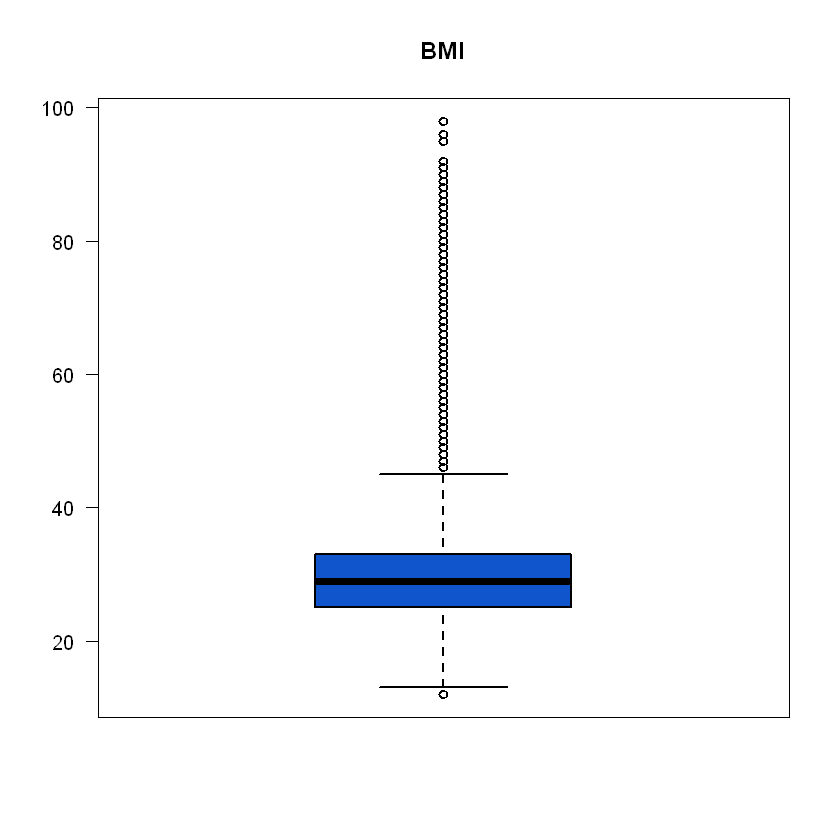

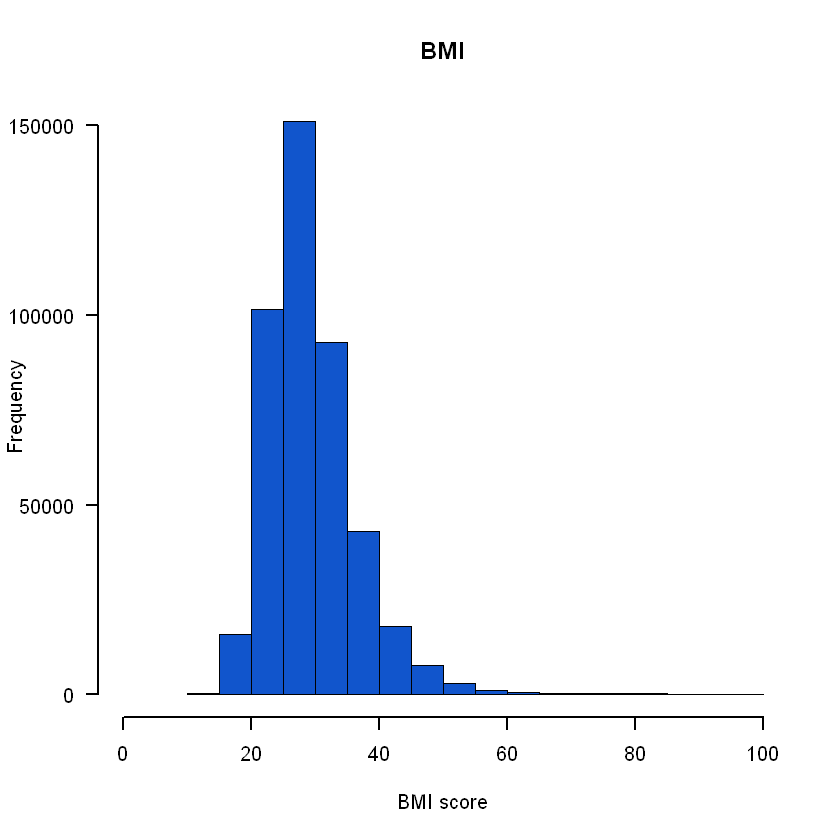

In [249]:
boxplot(balanced_df$BMI, main = "BMI", col = MAIN_COLOR, las = 1, lwd = 2)
hist(balanced_df$BMI, main = "BMI", xlab = "BMI score", col = MAIN_COLOR, las = 1, lwd = 2, xlim = c(0, 100))

In [250]:
BMI_q1 = quantile(balanced_df$BMI, probs = 0.25, names = F)
BMI_q3 = quantile(balanced_df$BMI, probs = 0.75, names = F)
BMI_upper_quartile = BMI_q3 + 1.5 * (BMI_q3 - BMI_q1)
cat("Maximum value of boxplot BMI:", BMI_upper_quartile)

Maximum value of boxplot BMI: 45

#### Question: The percentage of diabetes people having BMI under 45 and over 45.

In [251]:
BMI_THRESH_HOLD = 45

In [252]:
BMI_table = table(ifelse(balanced_df$BMI > BMI_THRESH_HOLD, sprintf("BMI > %d", BMI_THRESH_HOLD), sprintf("BMI < %d", BMI_THRESH_HOLD)),
      ifelse(balanced_df$Diabetes_binary == 1, "diabetes", "no diabetes"))
BMI_table = BMI_table[, c(2, 1)]
BMI_table

          
           no diabetes diabetes
  BMI < 45      215209   207846
  BMI > 45        3125    10420

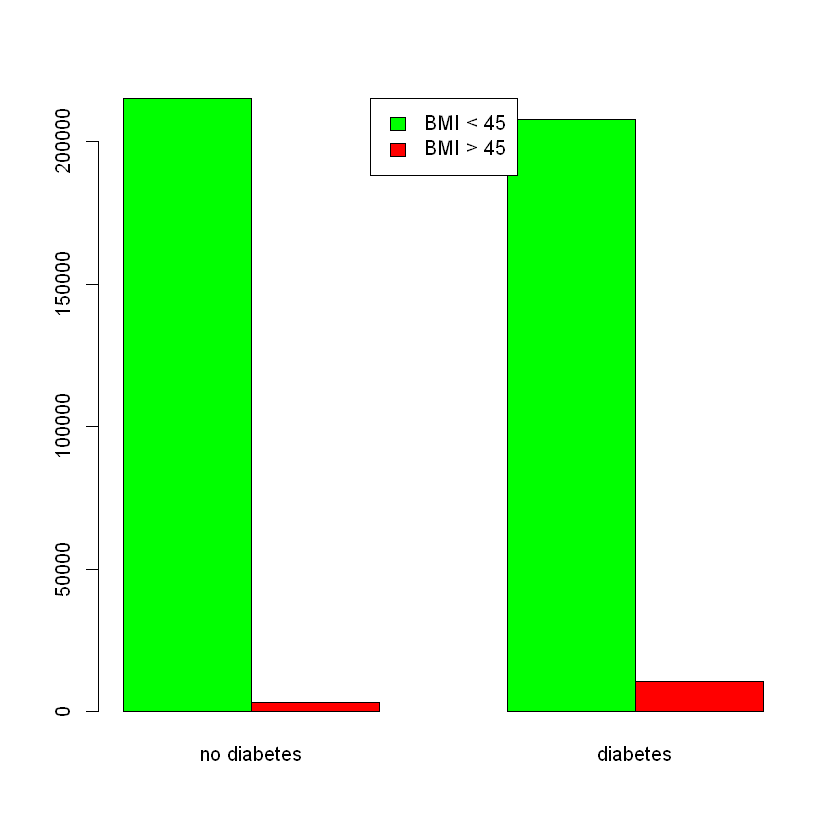

In [253]:
plot_stack_bar_2x2(BMI_table)

In [254]:
DescTools::OddsRatio(BMI_table, conf.level = 0.95)

odds ratio     lwr.ci     upr.ci 
  3.452522   3.315734   3.594953

In [255]:
# COMMENT
# odds ratio = 3.452 > 1
# People with BMI over 45 are 3.452 times more likely to have diabetes than others.
# => Create a binary variable that to distinguish people having BMI over 45.

In [256]:
if (!"BMI_over_45" %in% binary_cols)
{
    binary_cols = append(binary_cols, "BMI_over_45")
}

In [257]:
new_column = as.integer(ifelse(balanced_df$BMI > BMI_THRESH_HOLD, 1, 0))
BMI_index = which(colnames(balanced_df) == "BMI")
balanced_df = cbind(balanced_df[,1:BMI_index], BMI_over_45 = new_column, balanced_df[,(BMI_index+1):ncol(balanced_df)])

In [258]:
balanced_df

,HighBP,HighChol,CholCheck,BMI,BMI_over_45,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,⋯,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<ord>,<int>,<int>,<fct>,<fct>,<ord>,<ord>,<ord>,<fct>
1,1,1,1,40,0,1,0,0,0,0,⋯,0,5,18,15,1,0,9,4,3,0
2,0,0,0,25,0,1,0,0,1,0,⋯,1,3,0,0,0,0,7,6,1,0
3,1,1,1,28,0,0,0,0,0,1,⋯,1,5,30,30,1,0,9,4,8,0
4,1,0,1,27,0,0,0,0,1,1,⋯,0,2,0,0,0,0,11,3,6,0
5,1,1,1,24,0,0,0,0,1,1,⋯,0,2,3,0,0,0,11,5,4,0
6,1,1,1,25,0,1,0,0,1,1,⋯,0,2,0,2,0,1,10,6,8,0
7,1,0,1,30,0,1,0,0,0,0,⋯,0,3,0,14,0,0,9,6,7,0
8,1,1,1,25,0,1,0,0,1,0,⋯,0,3,0,0,1,0,11,4,4,0
9,0,0,1,24,0,0,0,0,0,0,⋯,0,2,0,0,0,1,8,4,3,0


#### 3.4.2. MentHlth

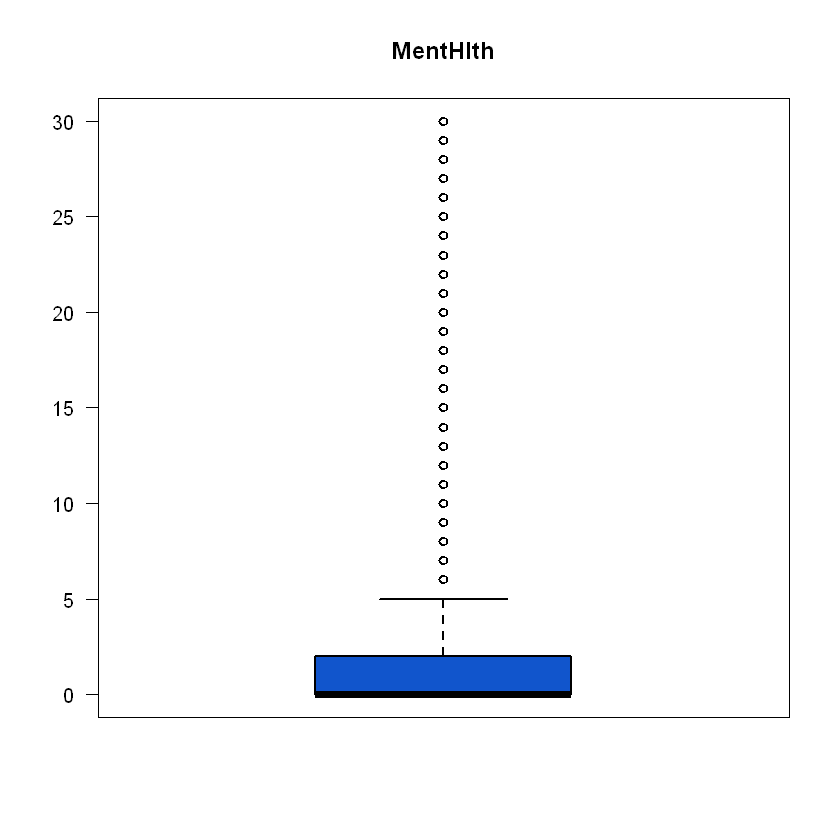

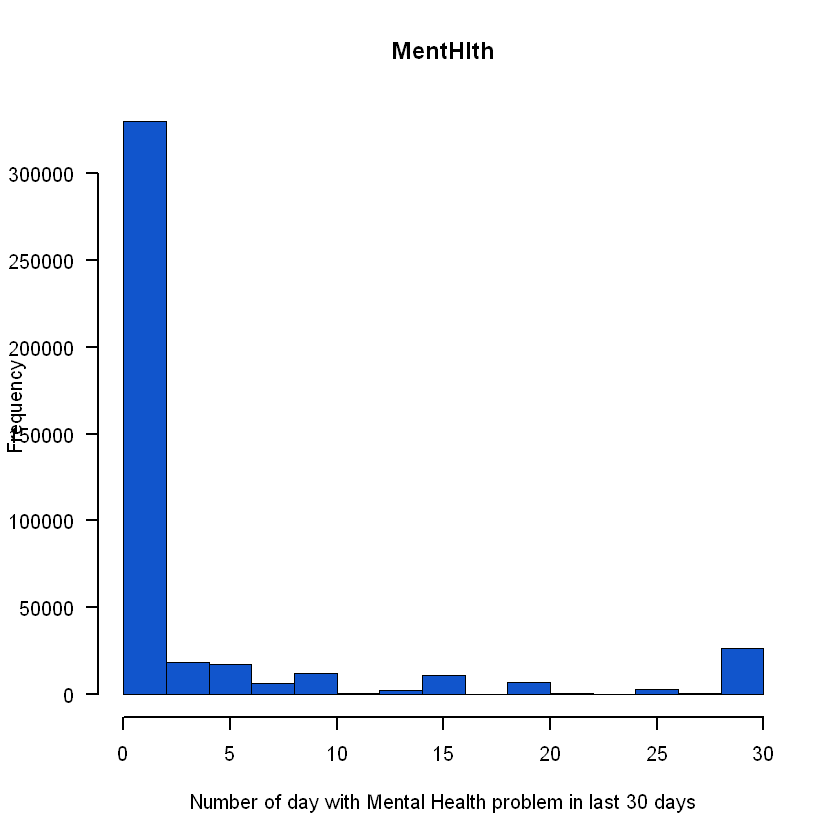

In [259]:
boxplot(balanced_df$MentHlth, main = "MentHlth", col = MAIN_COLOR, las = 1, lwd = 2)
hist(balanced_df$MentHlth, main = "MentHlth", xlab = "Number of day with Mental Health problem in last 30 days",
    col = MAIN_COLOR, las = 1, lwd = 2, xlim = c(0, 30))

#### Question: The percentage of diabetes people having MentHlth or not.

In [260]:
MentHlth_table = table(ifelse(balanced_df$MentHlth > 0, "have MentHlth", "no MentHlth"),
      ifelse(balanced_df$Diabetes_binary == 1, "diabetes", "no diabetes"))

In [261]:
MentHlth_table = Rev(MentHlth_table)

In [262]:
MentHlth_table

               
                no diabetes diabetes
  no MentHlth        152277   144346
  have MentHlth       66057    73920

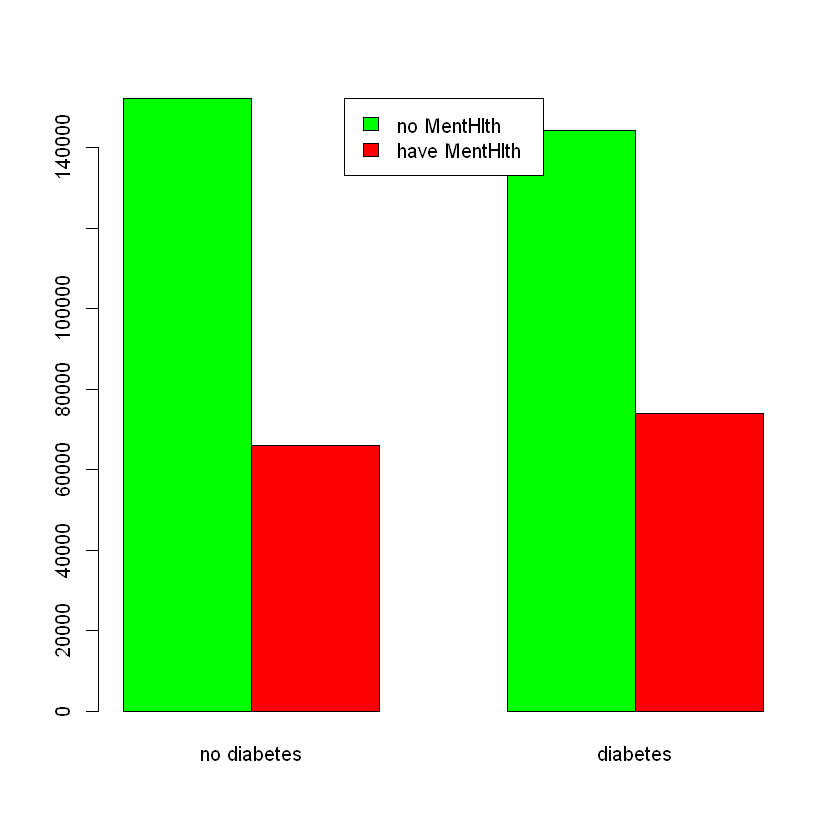

In [263]:
plot_stack_bar_2x2(MentHlth_table)

In [264]:
DescTools::OddsRatio(MentHlth_table, conf.level = 0.95)

odds ratio     lwr.ci     upr.ci 
  1.180518   1.165590   1.195638

In [265]:
# COMMENT
# odd ratio is close to 1
# => No creating new binary variable

#### 3.4.3. PhysHlth

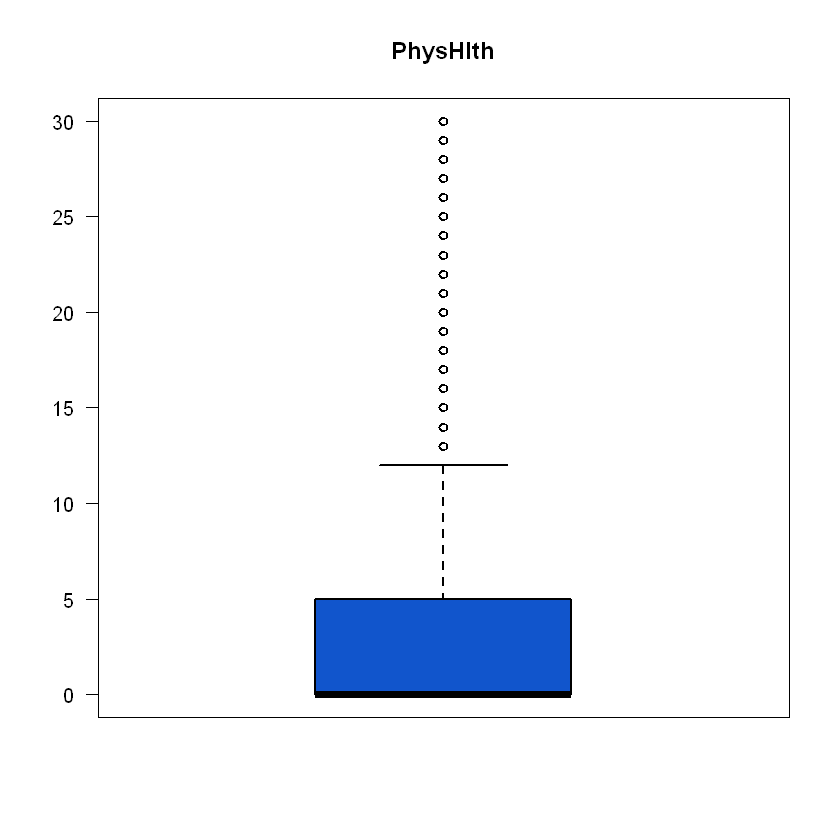

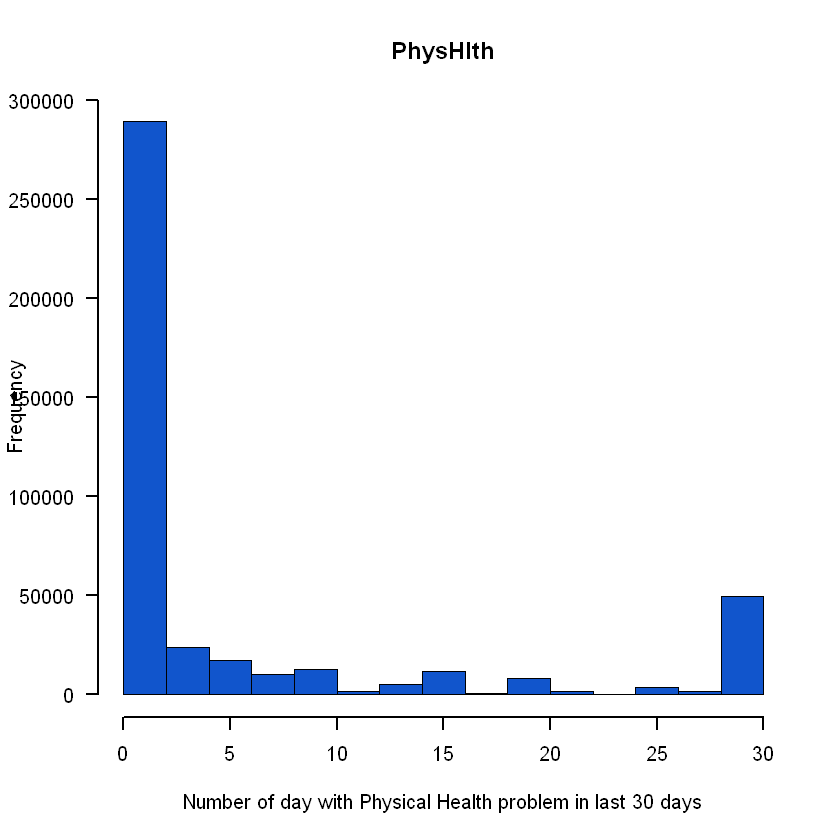

In [266]:
boxplot(balanced_df$PhysHlth, main = "PhysHlth", col = MAIN_COLOR, las = 1, lwd = 2)
hist(balanced_df$PhysHlth, main = "PhysHlth", xlab = "Number of day with Physical Health problem in last 30 days",
    col = MAIN_COLOR, las = 1, lwd = 2, xlim = c(0, 30))

#### Question: The percentage of diabetes people having PhysHlth or not.

In [267]:
PhysHlth_table = table(ifelse(balanced_df$PhysHlth > 0, "have PhysHlth", "no PhysHlth"),
      ifelse(balanced_df$Diabetes_binary == 1, "diabetes", "no diabetes"))

In [268]:
PhysHlth_table = Rev(PhysHlth_table)

In [269]:
PhysHlth_table

               
                no diabetes diabetes
  no PhysHlth        143312   103498
  have PhysHlth       75022   114768

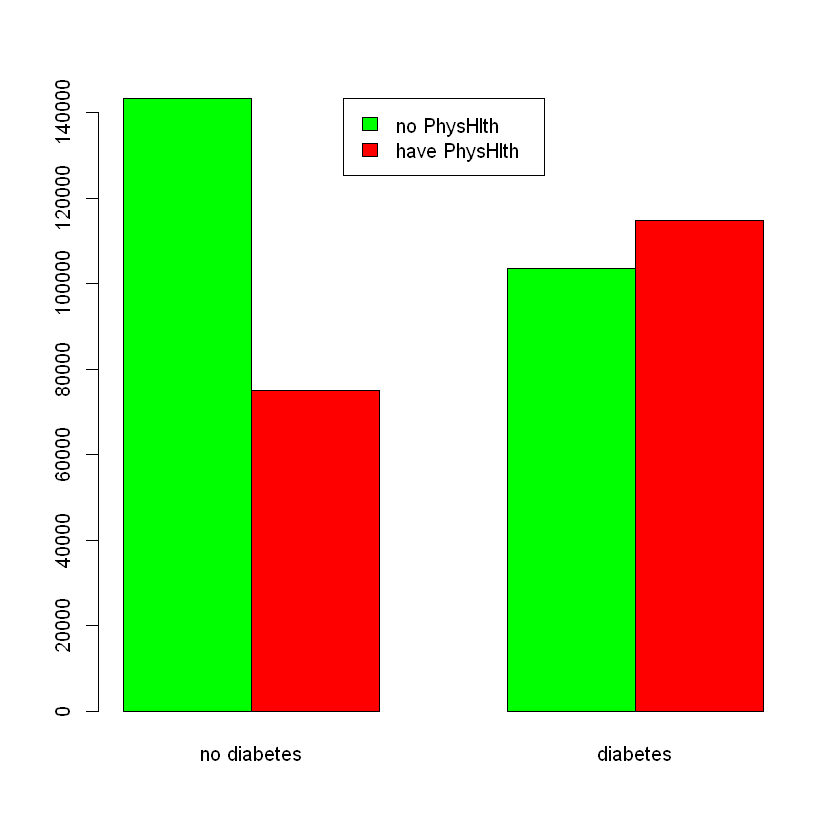

In [270]:
plot_stack_bar_2x2(PhysHlth_table)

In [271]:
OddsRatio(PhysHlth_table, conf.level = 0.95)

odds ratio     lwr.ci     upr.ci 
  2.118277   2.092612   2.144257

In [272]:
# odds ratio = 2.118 > 1
# People have PhysHlth are 2.118 times more likely to have diabetes than others.
# => Create a binary variable that to distinguish people having PhysHlth.

In [273]:
if (! "havePhysHlth" %in% binary_cols)
{
    binary_cols = append(binary_cols, "havePhysHlth")
}

In [274]:
binary_cols

[1] "HighBP"               "HighChol"             "CholCheck"           
 [4] "Smoker"               "Stroke"               "HeartDiseaseorAttack"
 [7] "PhysActivity"         "Fruits"               "Veggies"             
[10] "HvyAlcoholConsump"    "AnyHealthcare"        "NoDocbcCost"         
[13] "DiffWalk"             "Sex"                  "BMI_over_45"         
[16] "havePhysHlth"

In [275]:
new_column = as.integer(ifelse(balanced_df$PhysHlth > 0, 1, 0))
PhysHlth_index = which(colnames(balanced_df) == "PhysHlth")
balanced_df = cbind(balanced_df[,1:PhysHlth_index], havePhysHlth = new_column, balanced_df[,(PhysHlth_index+1):ncol(balanced_df)])

In [276]:
balanced_df

,HighBP,HighChol,CholCheck,BMI,BMI_over_45,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,⋯,GenHlth,MentHlth,PhysHlth,havePhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<ord>,<int>,<int>,<int>,<fct>,<fct>,<ord>,<ord>,<ord>,<fct>
1,1,1,1,40,0,1,0,0,0,0,⋯,5,18,15,1,1,0,9,4,3,0
2,0,0,0,25,0,1,0,0,1,0,⋯,3,0,0,0,0,0,7,6,1,0
3,1,1,1,28,0,0,0,0,0,1,⋯,5,30,30,1,1,0,9,4,8,0
4,1,0,1,27,0,0,0,0,1,1,⋯,2,0,0,0,0,0,11,3,6,0
5,1,1,1,24,0,0,0,0,1,1,⋯,2,3,0,0,0,0,11,5,4,0
6,1,1,1,25,0,1,0,0,1,1,⋯,2,0,2,1,0,1,10,6,8,0
7,1,0,1,30,0,1,0,0,0,0,⋯,3,0,14,1,0,0,9,6,7,0
8,1,1,1,25,0,1,0,0,1,0,⋯,3,0,0,0,1,0,11,4,4,0
9,0,0,1,24,0,0,0,0,0,0,⋯,2,0,0,0,0,1,8,4,3,0


### 3.5. Categorical - binary variables analysis

In [277]:
binary_cols

[1] "HighBP"               "HighChol"             "CholCheck"           
 [4] "Smoker"               "Stroke"               "HeartDiseaseorAttack"
 [7] "PhysActivity"         "Fruits"               "Veggies"             
[10] "HvyAlcoholConsump"    "AnyHealthcare"        "NoDocbcCost"         
[13] "DiffWalk"             "Sex"                  "BMI_over_45"         
[16] "havePhysHlth"

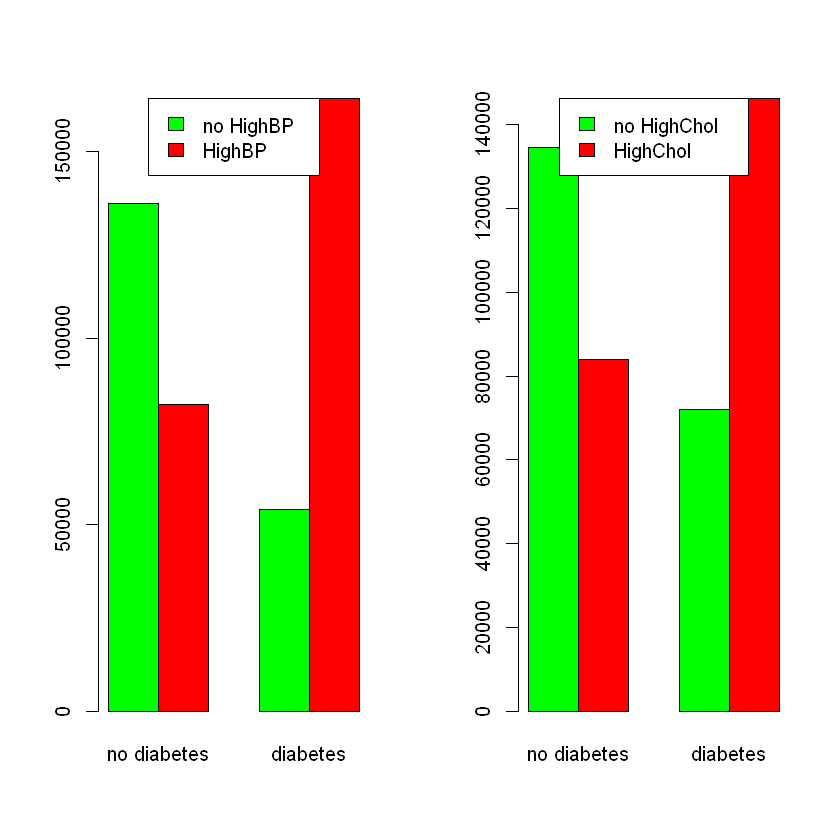

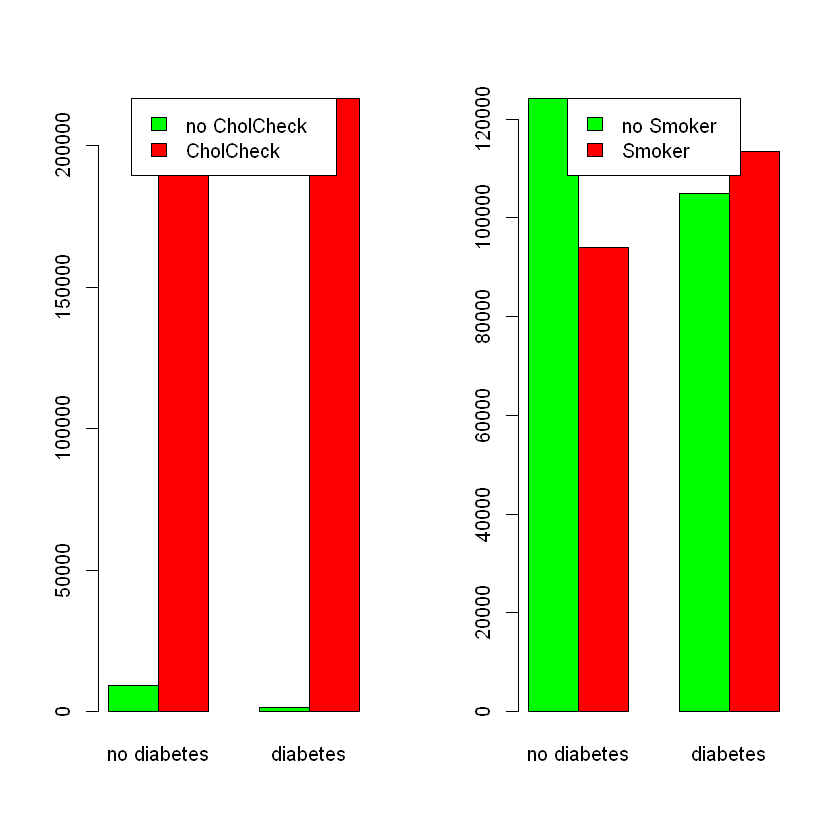

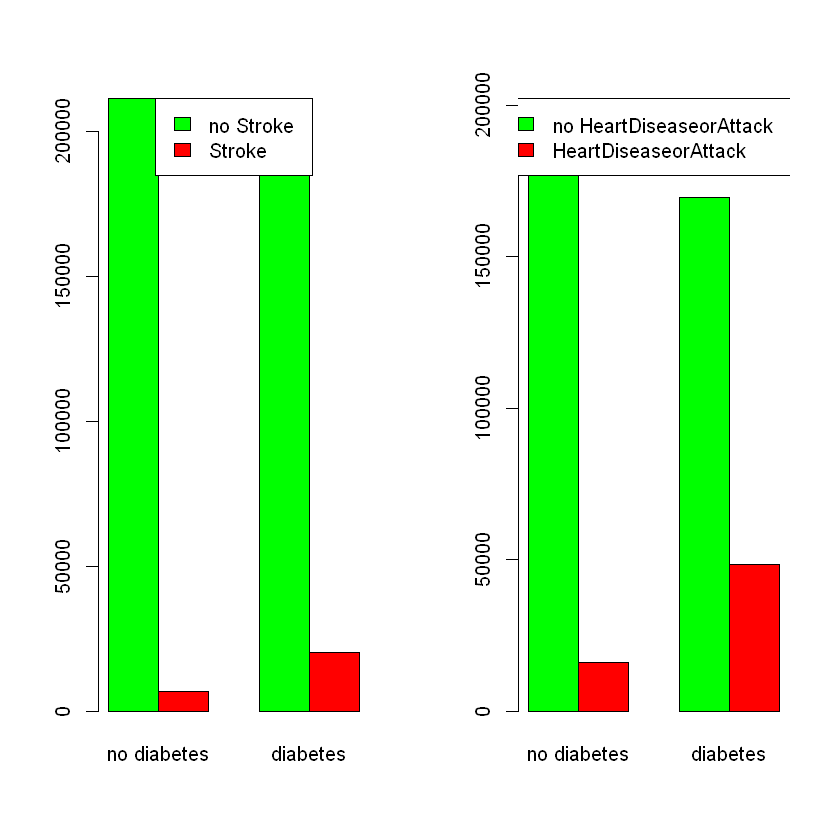

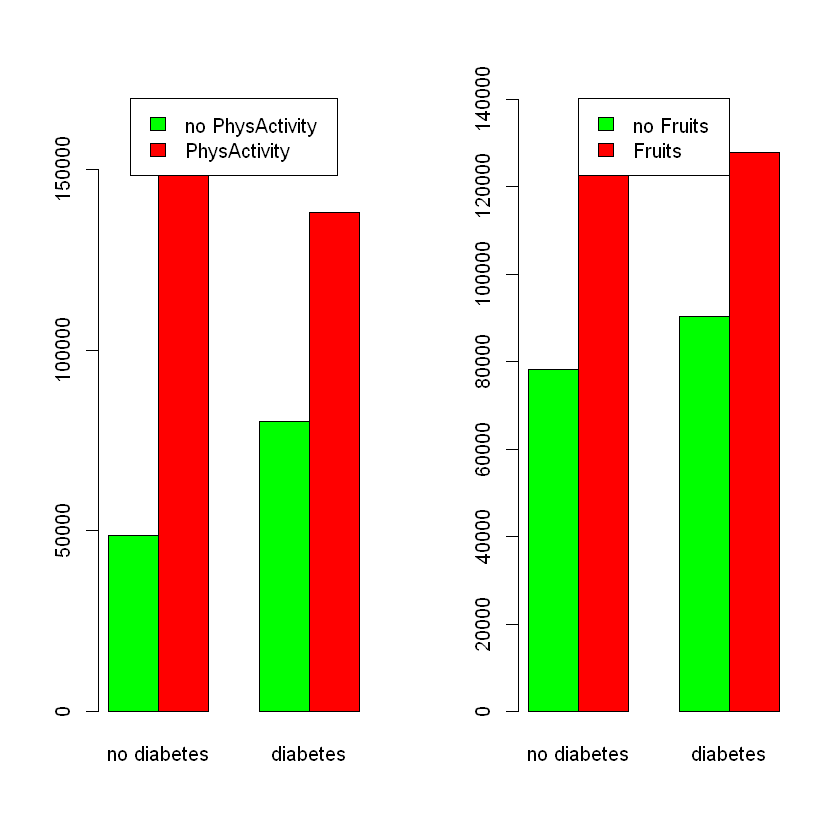

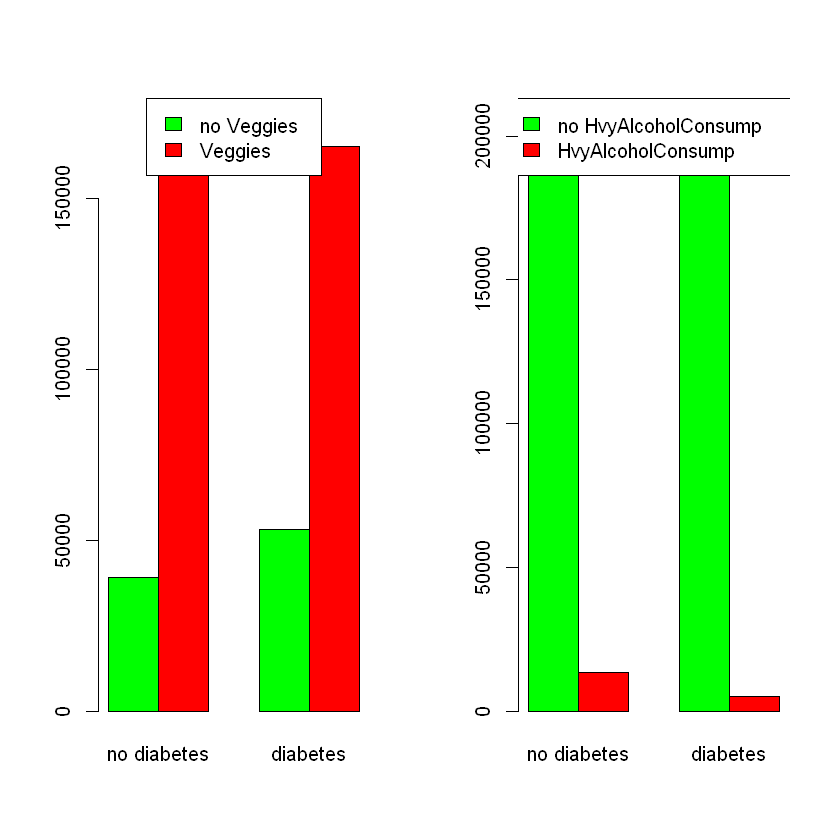

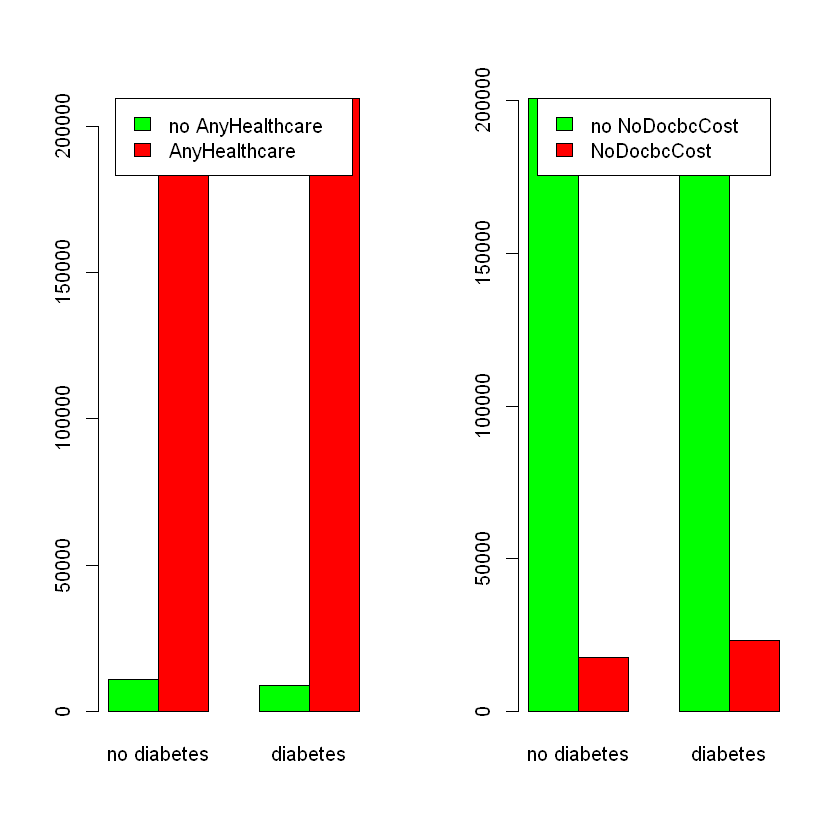

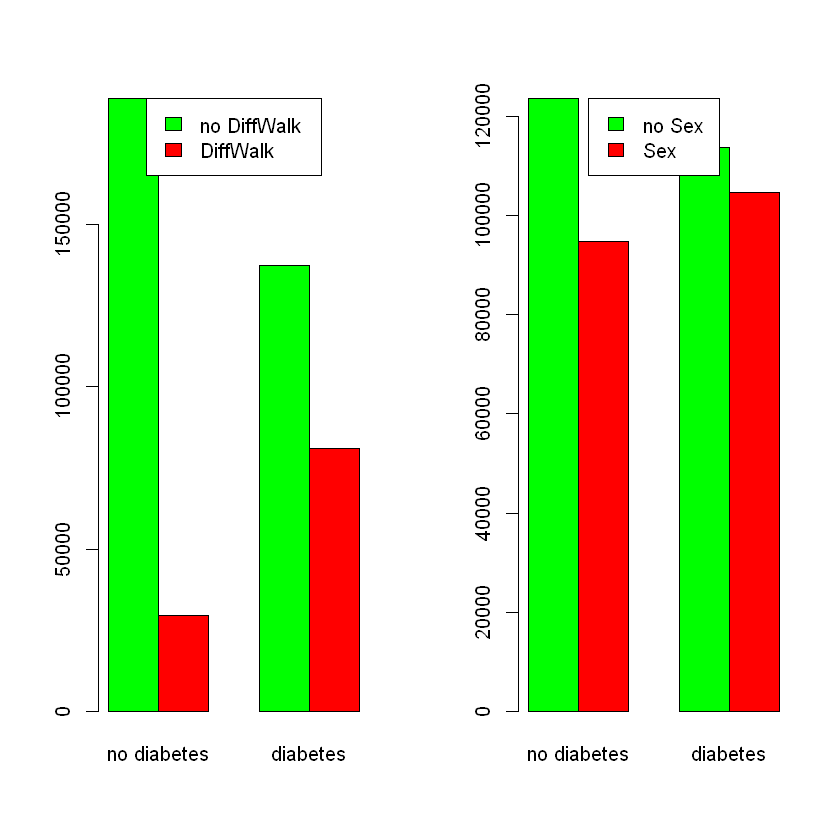

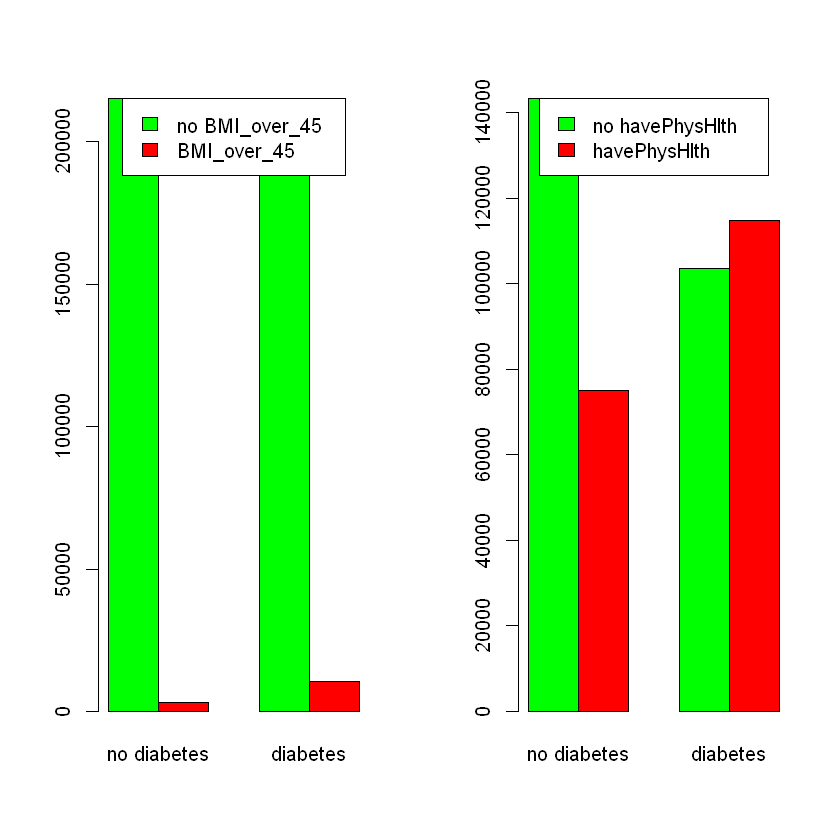

In [278]:
par(mfrow = c(1,2))
for (col in binary_cols)
{
    contingency_table = table(balanced_df[, col], balanced_df$Diabetes_binary)
    rownames(contingency_table) = c(sprintf("no %s", col), col)
    colnames(contingency_table) = c("no diabetes", "diabetes")
    plot_stack_bar_2x2(contingency_table)
}

In [279]:
summary_categorical_variables = function(df, explain_col, response_col, is.binary = T, prop.r = T,
                                        prop.c = T, prop.t = T)
{
    contingency_table = table(df[, explain_col], df[, response_col], dnn = c(explain_col, response_col))
    if (is.binary)
    {
        rownames(contingency_table) = c(paste("no", explain_col), explain_col)
        gmodels::CrossTable(contingency_table, prop.r = prop.r, prop.c = prop.c, prop.t = prop.t, prop.chisq = FALSE, chisq = T)
        print("Odds Ratio")
        print(OddsRatio(contingency_table, conf.level = 0.95))
        print("Relative Risk")
        print(RelRisk(contingency_table, conf.level = 0.95, method = "wald"))
    }
    else
    {
        CrossTable(contingency_table, prop.r = prop.r, prop.c = prop.c, prop.t = prop.t, prop.chisq = FALSE, chisq = T)
    }
}

In [280]:
for (bin_col in binary_cols)
{
    summary_categorical_variables(balanced_df, bin_col, response_col)
}


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  436600 

 
             | Diabetes_binary 
      HighBP |         0 |         1 | Row Total | 
-------------|-----------|-----------|-----------|
   no HighBP |    136109 |     54037 |    190146 | 
             |     0.716 |     0.284 |     0.436 | 
             |     0.623 |     0.248 |           | 
             |     0.312 |     0.124 |           | 
-------------|-----------|-----------|-----------|
      HighBP |     82225 |    164229 |    246454 | 
             |     0.334 |     0.666 |     0.564 | 
             |     0.377 |     0.752 |           | 
             |     0.188 |     0.376 |           | 
-------------|-----------|-----------|-----------|
Column Total |    218334 |    218266 |    436600 | 
             |     0.500 |     0.500 |           | 
-----------

### 3.6. Categorical - ordinal variables analysis

In [281]:
ordinal_cols

[1] "GenHlth"   "Age"       "Education" "Income"

In [282]:
for (ord_col in ordinal_cols)
{
    summary_categorical_variables(df, ord_col, response_col, is.binary = F)
}


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  253680 

 
             | Diabetes_binary 
     GenHlth |         0 |         1 | Row Total | 
-------------|-----------|-----------|-----------|
           1 |     44159 |      1140 |     45299 | 
             |     0.975 |     0.025 |     0.179 | 
             |     0.202 |     0.032 |           | 
             |     0.174 |     0.004 |           | 
-------------|-----------|-----------|-----------|
           2 |     82703 |      6381 |     89084 | 
             |     0.928 |     0.072 |     0.351 | 
             |     0.379 |     0.181 |           | 
             |     0.326 |     0.025 |           | 
-------------|-----------|-----------|-----------|
           3 |     62189 |     13457 |     75646 | 
             |     0.822 |     0.178 |     0.298 | 
           

In [283]:
plot_ordinal_data = function(dataframe, ordinal_col)
{
    barplot(summary(factor(dataframe[no_diabetes_rows, ][, ordinal_col])), main = sprintf("no_diabetes_rows - %s", ordinal_col),
           col = MAIN_COLOR, las = 1, lwd = 2)
    barplot(summary(factor(dataframe[with_diabetes_rows, ][, ordinal_col])), main = sprintf("no_diabetes_rows - %s", ordinal_col),
           col = MAIN_COLOR, las = 1, lwd = 2)
}

#### 3.6.1. GenHlth

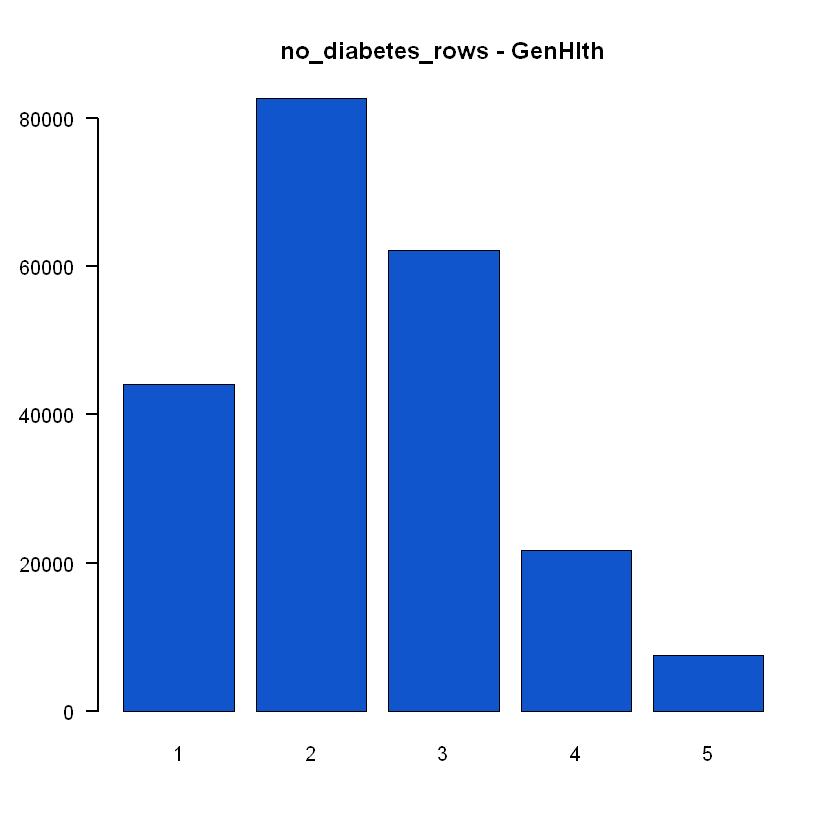

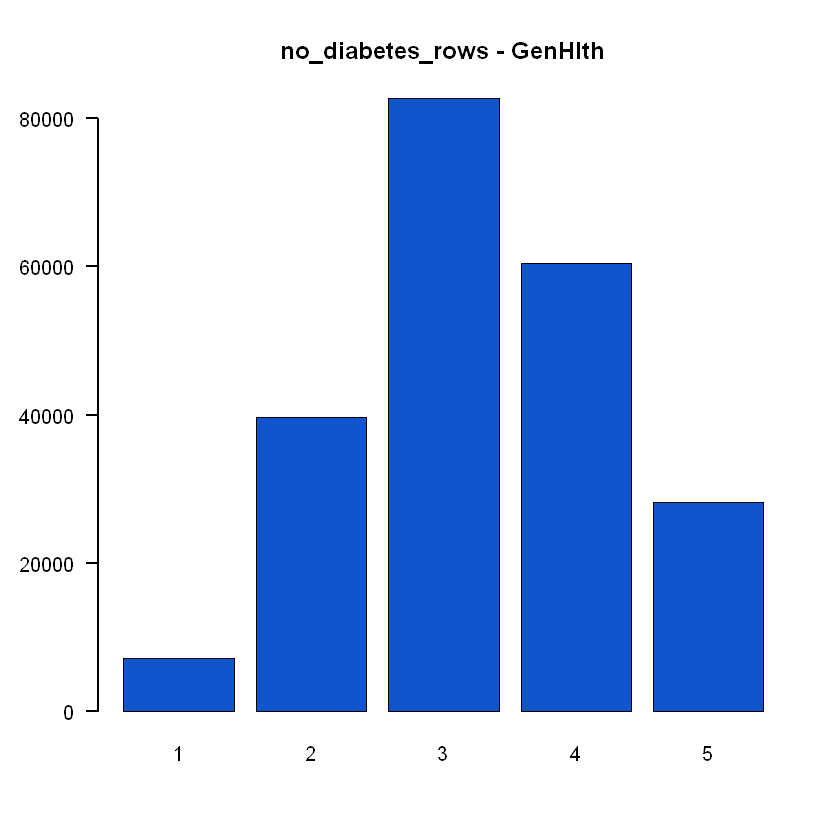

In [284]:
plot_ordinal_data(balanced_df, "GenHlth")

#### 3.6.2. Age

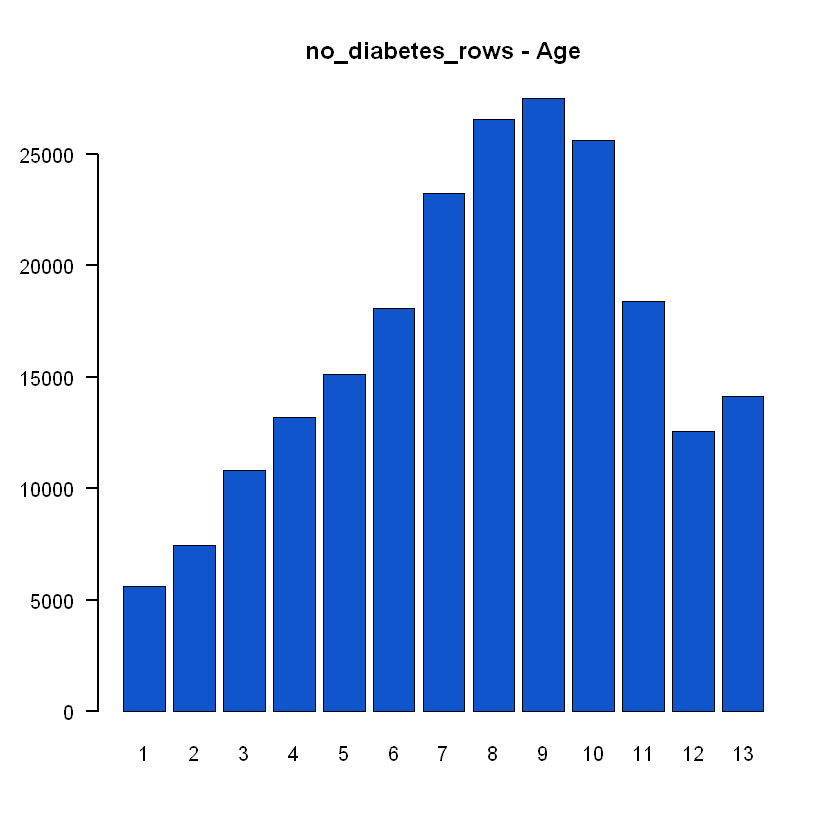

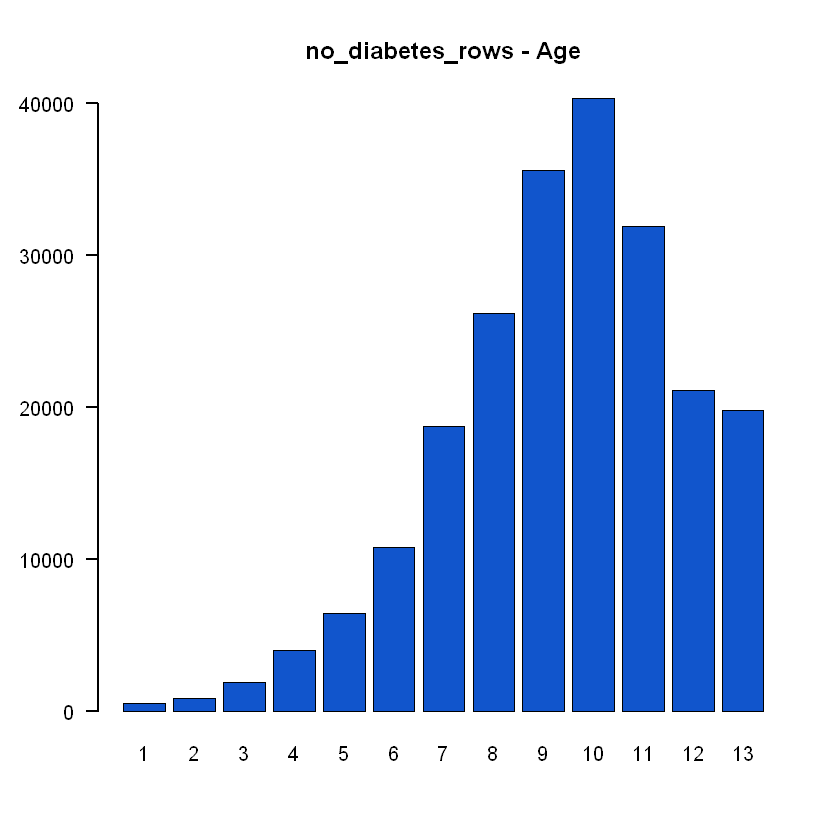

In [285]:
plot_ordinal_data(balanced_df, "Age")

#### 3.6.3. Education

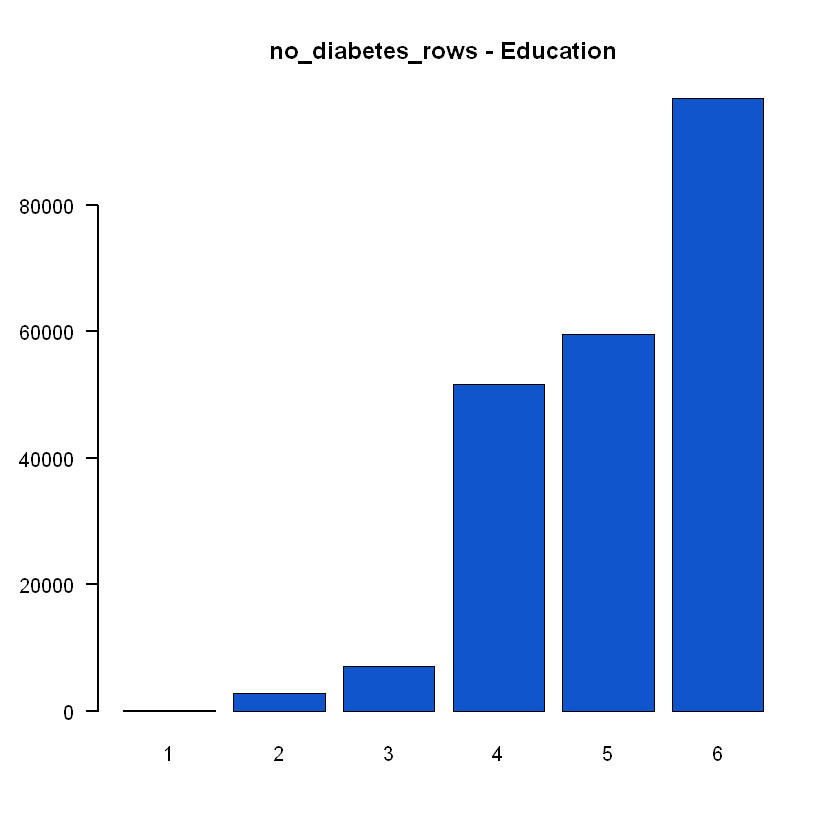

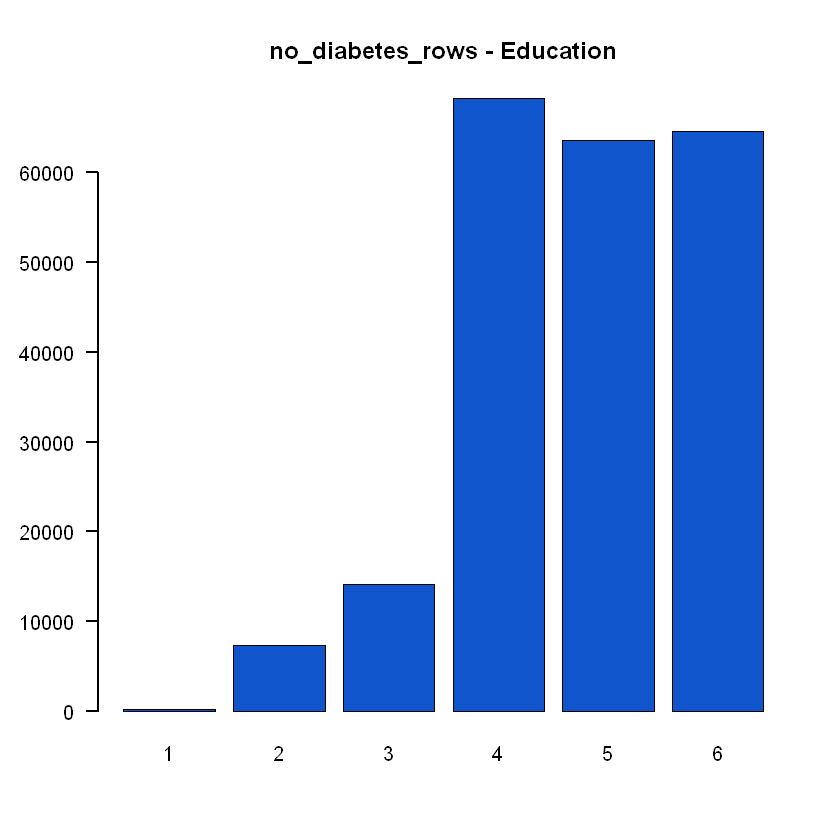

In [286]:
plot_ordinal_data(balanced_df, "Education")

#### 3.6.4. Income

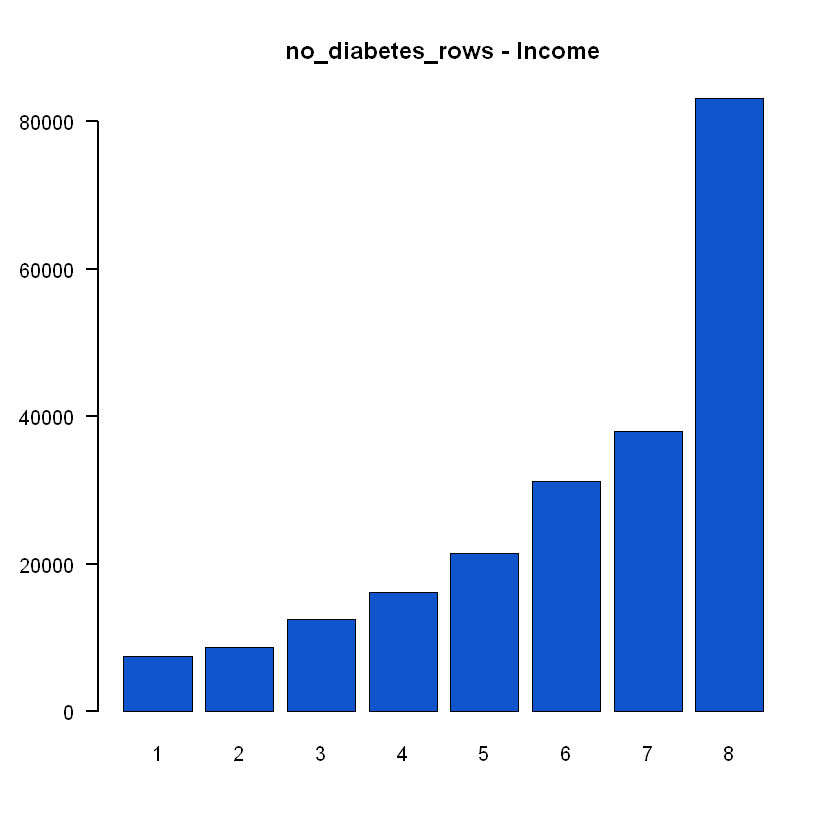

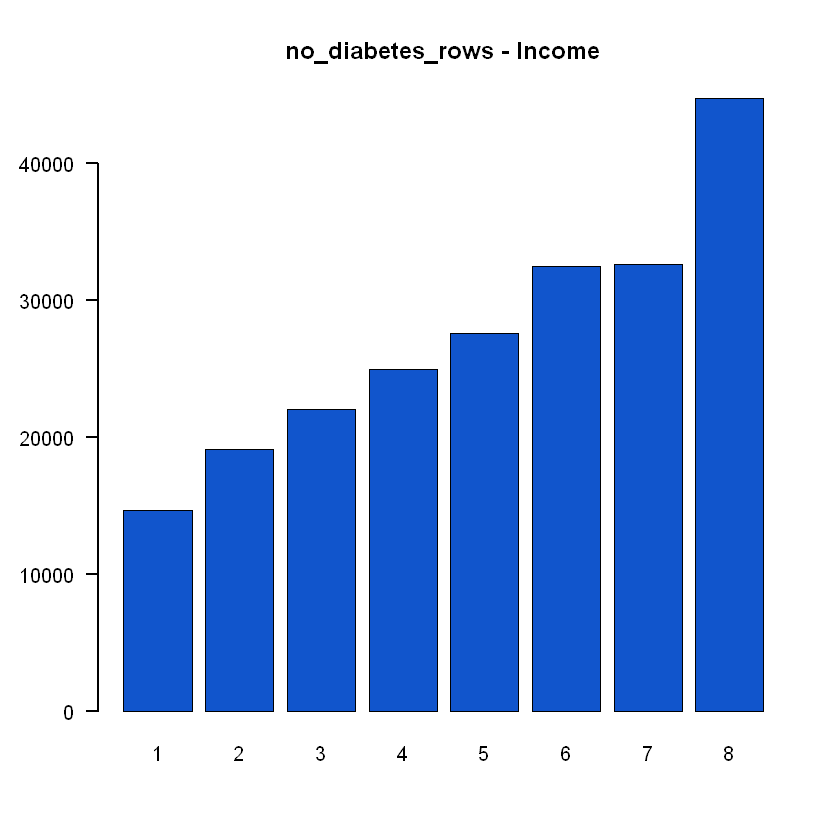

In [287]:
plot_ordinal_data(balanced_df, "Income")

### 3.7. Correlation analysis

In [288]:
get_correlation = function(dataframe, col_1, col_2, numerical_cols, binary_cols, ordinal_cols, response_col)
{
    if (col_1 %in% ordinal_cols || col_2 %in% ordinal_cols)
    {
        return (pcaPP::cor.fk(dataframe[,col_1], dataframe[,col_2]))
    }
    else if (col_1 %in% numerical_cols && col_2 %in% c(binary_cols, response_col) ||
             col_1 %in% c(binary_cols, response_col) && col_2 %in% numerical_cols)
    {
        return (cor.test(as.numeric(dataframe[,col_1]), as.numeric(dataframe[,col_2]))$estimate)
    }
    else if (col_1 %in% c(binary_cols, response_col) && col_2 %in% c(binary_cols, response_col))
    {
        return (rcompanion::cramerV(table(dataframe[ ,c(col_1, col_2)])))
    }
    else if (col_1 %in% numerical_cols && col_2 %in% numerical_cols)
    {
        return (cor(dataframe[,col_1], dataframe[,col_2]))
    }
    else
    {
        return (0)
    }
}    

In [289]:
all_colnames = colnames(balanced_df)

In [290]:
correlation_matrix = matrix(0, nrow = length(all_colnames), ncol = length(all_colnames), dimnames = list(all_colnames, all_colnames))

In [291]:
for (row_index in 1:nrow(correlation_matrix))
{
    for (col_index in row_index:ncol(correlation_matrix))
    {
        if (row_index == col_index)
        {
            correlation_matrix[row_index, col_index] = 1
        }
        else
        {
            correlation_matrix[row_index, col_index] = get_correlation(balanced_df, all_colnames[row_index],
                                                                       all_colnames[col_index], numerical_cols, 
                                                                       binary_cols, ordinal_cols, response_col)
        }
    }    
}

In [292]:
correlation_matrix

,HighBP,HighChol,CholCheck,BMI,BMI_over_45,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,⋯,GenHlth,MentHlth,PhysHlth,havePhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
HighBP,1,0.3176,0.10740,0.23610109,0.0742000,0.0880700,0.12940000,0.20820000,0.1350000,0.04083000,⋯,0.29181219,0.068092318,0.170322545,0.1466000,0.2343000,0.040910000,0.274829667,-0.137129155,-0.1733972774,0.37900000
HighChol,0,1.0000,0.08729,0.12422352,0.0257800,0.0930600,0.09540000,0.17900000,0.0908300,0.04687000,⋯,0.21605057,0.085855324,0.140162214,0.1258000,0.1625000,0.018950000,0.187676847,-0.079289131,-0.0987634665,0.28610000
CholCheck,0,0.0000,1.00000,0.04797384,0.0126100,0.0038470,0.02428000,0.04419000,0.0054890,0.01635000,⋯,0.05733579,-0.002001476,0.036506922,0.0308400,0.0479200,0.013000000,0.082637112,-0.008038499,-0.0007673536,0.11440000
BMI,0,0.0000,0.00000,1.00000000,0.5753744,0.0129723,0.02458917,0.05835113,-0.1660643,-0.08402747,⋯,0.21959652,0.109597752,0.160745997,0.1548853,0.2412872,-0.002164233,-0.030530086,-0.094064852,-0.0922850794,0.28888567
BMI_over_45,0,0.0000,0.00000,0.00000000,1.0000000,0.0101200,0.00937900,0.01246000,0.0882900,0.03100000,⋯,0.11393026,0.081010107,0.110712362,0.0926600,0.1478000,0.050270000,-0.055634675,-0.039473942,-0.0741686155,0.09640000
Smoker,0,0.0000,0.00000,0.00000000,0.0000000,1.0000000,0.06045000,0.12550000,0.0810500,0.06912000,⋯,0.13331282,0.090121761,0.115431664,0.0702500,0.1196000,0.114700000,0.086298702,-0.137604346,-0.1007483134,0.08860000
Stroke,0,0.0000,0.00000,0.00000000,0.0000000,0.0000000,1.00000000,0.22420000,0.0771600,0.01271000,⋯,0.16389267,0.084744930,0.160569396,0.1205000,0.1924000,0.004818000,0.105306792,-0.065220749,-0.1166851780,0.12610000
HeartDiseaseorAttack,0,0.0000,0.00000,0.00000000,0.0000000,0.0000000,0.00000000,1.00000000,0.0981800,0.02002000,⋯,0.24392523,0.080071951,0.199152022,0.1504000,0.2336000,0.097880000,0.192733622,-0.089639902,-0.1341876683,0.21030000
PhysActivity,0,0.0000,0.00000,0.00000000,0.0000000,0.0000000,0.00000000,0.00000000,1.0000000,0.13200000,⋯,-0.24712748,-0.132366358,-0.237765452,0.1643000,0.2755000,0.051770000,-0.081208558,0.177637724,0.1795582577,0.15840000
Fruits,0,0.0000,0.00000,0.00000000,0.0000000,0.0000000,0.00000000,0.00000000,0.0000000,1.00000000,⋯,-0.09073969,-0.061481308,-0.047274448,0.0408700,0.0504400,0.090290000,0.057130339,0.096483480,0.0665621517,0.05772000


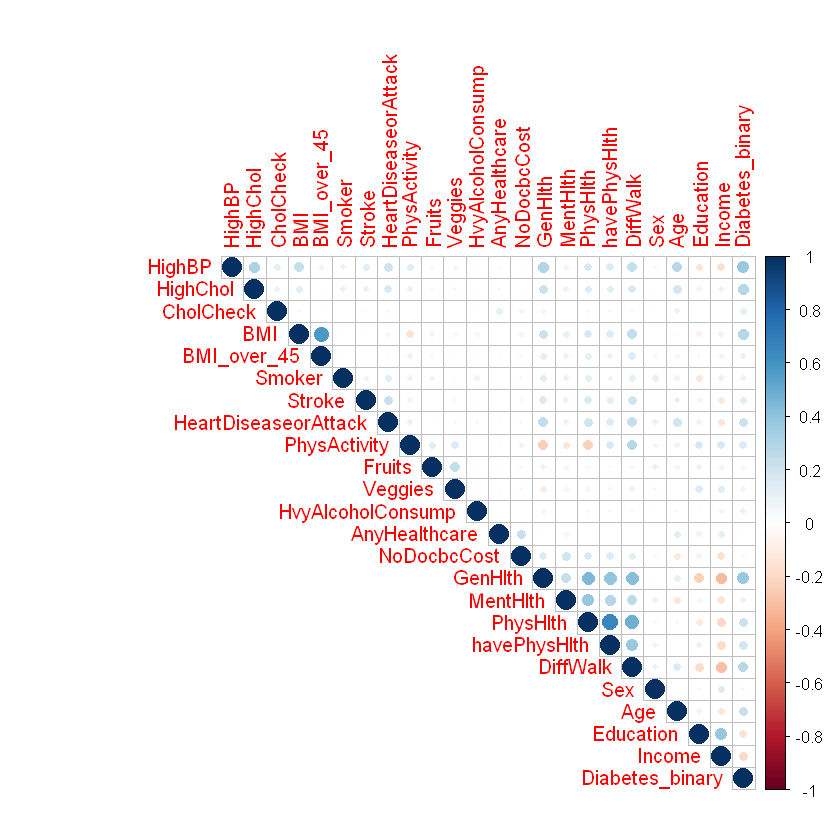

In [293]:
corrplot::corrplot(correlation_matrix, method="circle", type="upper")

## 4. Model building

In [294]:
str(balanced_df)

'data.frame':	436600 obs. of  24 variables:
 $ HighBP              : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 1 2 ...
 $ HighChol            : Factor w/ 2 levels "0","1": 2 1 2 1 2 2 1 2 1 2 ...
 $ CholCheck           : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 2 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 24 34 ...
 $ BMI_over_45         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Smoker              : Factor w/ 2 levels "0","1": 2 2 1 1 1 2 2 2 1 2 ...
 $ Stroke              : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ HeartDiseaseorAttack: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ PhysActivity        : Factor w/ 2 levels "0","1": 1 2 1 2 2 2 1 2 1 1 ...
 $ Fruits              : Factor w/ 2 levels "0","1": 1 1 2 2 2 2 1 1 1 2 ...
 $ Veggies             : Factor w/ 2 levels "0","1": 2 1 1 2 2 2 1 2 2 2 ...
 $ HvyAlcoholConsump   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ AnyHealthcare       : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2

### 4.1. Data standardization

#### BMI

In [295]:
balanced_df$BMI = scale(balanced_df$BMI)

#### MentHlth

In [296]:
balanced_df$MentHlth = scale(balanced_df$MentHlth)

#### MentHlth

In [297]:
balanced_df$PhysHlth = scale(balanced_df$PhysHlth)

In [298]:
str(balanced_df)

'data.frame':	436600 obs. of  24 variables:
 $ HighBP              : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 1 2 ...
 $ HighChol            : Factor w/ 2 levels "0","1": 2 1 2 1 2 2 1 2 1 2 ...
 $ CholCheck           : Factor w/ 2 levels "0","1": 2 1 2 2 2 2 2 2 2 2 ...
 $ BMI                 : num [1:436600, 1] 1.416 -0.681 -0.262 -0.402 -0.821 ...
  ..- attr(*, "scaled:center")= num 29.9
  ..- attr(*, "scaled:scale")= num 7.15
 $ BMI_over_45         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Smoker              : Factor w/ 2 levels "0","1": 2 2 1 1 1 2 2 2 1 2 ...
 $ Stroke              : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ HeartDiseaseorAttack: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ PhysActivity        : Factor w/ 2 levels "0","1": 1 2 1 2 2 2 1 2 1 1 ...
 $ Fruits              : Factor w/ 2 levels "0","1": 1 1 2 2 2 2 1 1 1 2 ...
 $ Veggies             : Factor w/ 2 levels "0","1": 2 1 1 2 2 2 1 2 2 2 ...
 $ HvyAlcoholConsump   : Factor w/ 2 levels "0"

### 4.2. Data splitting

In [299]:
index = caret::createDataPartition(balanced_df$Diabetes_binary, p = 0.8, list = FALSE)
balanced_training_data = balanced_df[index, ]
balanced_testing_data = balanced_df[-index, ]

nrow(balanced_training_data)
nrow(balanced_testing_data)
nrow(balanced_training_data[balanced_training_data$Diabetes_binary == 1, ]) / nrow(balanced_training_data)
nrow(balanced_testing_data[balanced_testing_data$Diabetes_binary == 1, ]) / nrow(balanced_testing_data)

[1] 349281

[1] 87319

[1] 0.4999213

[1] 0.4999256

### 4.3. Build the model

In [300]:
my_model = glm(Diabetes_binary ~ . , data = balanced_training_data, family = binomial)

In [301]:
# AIC
# aic_result = MASS::stepAIC(my_model, direction = "backward", k = 2)

In [302]:
# # Best AIC model
# Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI + BMI_over_45 + 
#     Smoker + Stroke + HeartDiseaseorAttack + PhysActivity + Fruits + 
#     Veggies + HvyAlcoholConsump + NoDocbcCost + GenHlth + MentHlth + 
#     PhysHlth + havePhysHlth + DiffWalk + Sex + Age + Education + 
#     Income

In [303]:
# BIC
# bic_result = MASS::stepAIC(my_model, direction = "backward", k = log(nrow(balanced_training_data)))

In [304]:
# # Best BIC model
# Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI + BMI_over_45 + 
#     Stroke + HeartDiseaseorAttack + PhysActivity + Veggies + 
#     HvyAlcoholConsump + GenHlth + MentHlth + PhysHlth + DiffWalk + 
#     Sex + Age + Education + Income

### 4.4. Best model selection

In [305]:
best_aic_model = glm(Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI + BMI_over_45 + 
    Smoker + Stroke + HeartDiseaseorAttack + PhysActivity + Fruits + 
    Veggies + HvyAlcoholConsump + NoDocbcCost + GenHlth + MentHlth + 
    PhysHlth + havePhysHlth + DiffWalk + Sex + Age + Education + 
    Income, data = balanced_training_data, family = binomial)

In [306]:
best_bic_model = glm(Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI + BMI_over_45 + 
    Stroke + HeartDiseaseorAttack + PhysActivity + Veggies + 
    HvyAlcoholConsump + GenHlth + MentHlth + PhysHlth + DiffWalk + 
    Sex + Age + Education + Income, data = balanced_training_data, family = binomial)

In [307]:
anova(best_aic_model, best_bic_model, test = "Chisq")

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,349234,356170.1,NA,NA,NA
2,349238,356196.3,-4,-26.24387,2.8256e-05


In [308]:
# COMMENT
# Choose "best_bic_model"

In [309]:
# best_bic_model = glm(Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI + BMI_over_45 + 
#     Stroke + HeartDiseaseorAttack + PhysActivity + Veggies + 
#     HvyAlcoholConsump + GenHlth + MentHlth + PhysHlth + DiffWalk + 
#     Sex + Age + Education + Income, data = balanced_training_data, family = binomial)

### 4.5. Link function selection

In [322]:
# Create the dataframe
aic_link_function_df <- data.frame(
  link_function_name = c("logit", "probit", "cauchit", "cloglog"),
  aic_value = rep(0, 4)
)
aic_link_function_df

link_function_name,aic_value
<chr>,<dbl>
logit,0
probit,0
cauchit,0
cloglog,0


### 4.5.1. Logit

In [324]:
logit_best_bic_model = glm(Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI + BMI_over_45 + 
    Stroke + HeartDiseaseorAttack + PhysActivity + Veggies + 
    HvyAlcoholConsump + GenHlth + MentHlth + PhysHlth + DiffWalk + 
    Sex + Age + Education + Income, data = balanced_training_data, family = binomial(link = "logit"))

In [325]:
aic_link_function_df[1, 2] = summary(logit_best_bic_model)$aic

In [326]:
probit_best_bic_model = glm(Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI + BMI_over_45 + 
    Stroke + HeartDiseaseorAttack + PhysActivity + Veggies + 
    HvyAlcoholConsump + GenHlth + MentHlth + PhysHlth + DiffWalk + 
    Sex + Age + Education + Income, data = balanced_training_data, family = binomial(link = "probit"))

In [327]:
aic_link_function_df[2, 2] = summary(probit_best_bic_model)$aic

In [328]:
cauchit_best_bic_model = glm(Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI + BMI_over_45 + 
    Stroke + HeartDiseaseorAttack + PhysActivity + Veggies + 
    HvyAlcoholConsump + GenHlth + MentHlth + PhysHlth + DiffWalk + 
    Sex + Age + Education + Income, data = balanced_training_data, family = binomial(link = "cauchit"))

In [329]:
aic_link_function_df[3, 2] = summary(cauchit_best_bic_model)$aic

In [330]:
cloglog_best_bic_model = glm(Diabetes_binary ~ HighBP + HighChol + CholCheck + BMI + BMI_over_45 + 
    Stroke + HeartDiseaseorAttack + PhysActivity + Veggies + 
    HvyAlcoholConsump + GenHlth + MentHlth + PhysHlth + DiffWalk + 
    Sex + Age + Education + Income, data = balanced_training_data, family = binomial(link = "cloglog"))

In [331]:
aic_link_function_df[4, 2] = summary(cloglog_best_bic_model)$aic

In [332]:
aic_link_function_df

link_function_name,aic_value
<chr>,<dbl>
logit,356282.3
probit,356441.8
cauchit,358469.5
cloglog,361234.2


In [333]:
aic_link_function_df[which.min(aic_link_function_df$aic_value), ]

,link_function_name,aic_value
,<chr>,<dbl>
1,logit,356282.3


## 5. Model training and evaluating

In [342]:
evaluate_classification_model = function(binary_predictions, binary_real_data)
{
    accuracy = mean(binary_predictions == binary_real_data)
    precision <- sum(binary_predictions == 1 & binary_real_data == 1) / sum(binary_predictions == 1)
    recall <- sum(binary_predictions == 1 & binary_real_data == 1) / sum(binary_real_data == 1)
    f1_score <- 2 * precision * recall / (precision + recall)
    
    # Print the results
    cat("Accuracy:", accuracy, "\n")
    cat("Precision:", precision, "\n")
    cat("Recall:", recall, "\n")
    cat("F1 Score:", f1_score, "\n")
}

one_for_all_metric = function(model, new_data, variable_name, binary_threshold = 0.5)
{
    predictions = predict(model, newdata = new_data, type = "response")
    binary_predictions <- ifelse(predictions >= binary_threshold, 1, 0)
    actual_response = new_data[, variable_name]
    
    cat("\n", "Metric 1: ANOVA", "\n")
    print(summary(model))

    cat("\n", "Metric 2: Model performance", "\n")
    print(confusionMatrix(table(binary_predictions, actual_response)))
    evaluate_classification_model(binary_predictions, actual_response)

    cat("\n", "Metric 3: ROC curve - AUC", "\n")
    roc_score = pROC::roc(actual_response, binary_predictions)
    cat("AUC: ", auc(roc_score))
    plot(roc_score ,main = "ROC curve -- Logistic Regression ")
    
    cat("\n", "Metric 4: Overdispersion tests", "\n")
    DHARMa::testDispersion(model, alternative = "greater")

    cat("\n", "Metric 4: Goodness-of-fit", "\n")
    summary_model = summary(model)
    cat("residual:", summary_model$deviance, "\n")
    cat("dof:", summary_model$df[2], "\n")
    cat("goodness-of-fit:", 1- pchisq(summary_model$deviance, df = summary_model$df[2]))

    cat("\n", "Metric 5: QQ-norm", "\n")
    qqnorm(residuals(probit_best_bic_model))
    abline(a = 0, b = 1, col = "red")
}


 Metric 1: ANOVA 

Call:
glm(formula = Diabetes_binary ~ HighBP + HighChol + CholCheck + 
    BMI + BMI_over_45 + Stroke + HeartDiseaseorAttack + PhysActivity + 
    Veggies + HvyAlcoholConsump + GenHlth + MentHlth + PhysHlth + 
    DiffWalk + Sex + Age + Education + Income, family = binomial(link = "logit"), 
    data = balanced_training_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.3543  -0.8106  -0.0818   0.8279   3.0678  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -2.292355   0.045336 -50.563  < 2e-16 ***
HighBP1                0.705718   0.008909  79.217  < 2e-16 ***
HighChol1              0.535973   0.008538  62.773  < 2e-16 ***
CholCheck1             1.298470   0.036491  35.583  < 2e-16 ***
BMI                    0.573039   0.005701 100.508  < 2e-16 ***
BMI_over_45           -0.894147   0.031005 -28.839  < 2e-16 ***
Stroke1                0.189410   0.018259  10.373  < 2e-16 ***
HeartDiseas

Setting levels: control = 0, case = 1

Setting direction: controls < cases



AUC:  0.7486364
 Metric 4: Overdispersion tests 


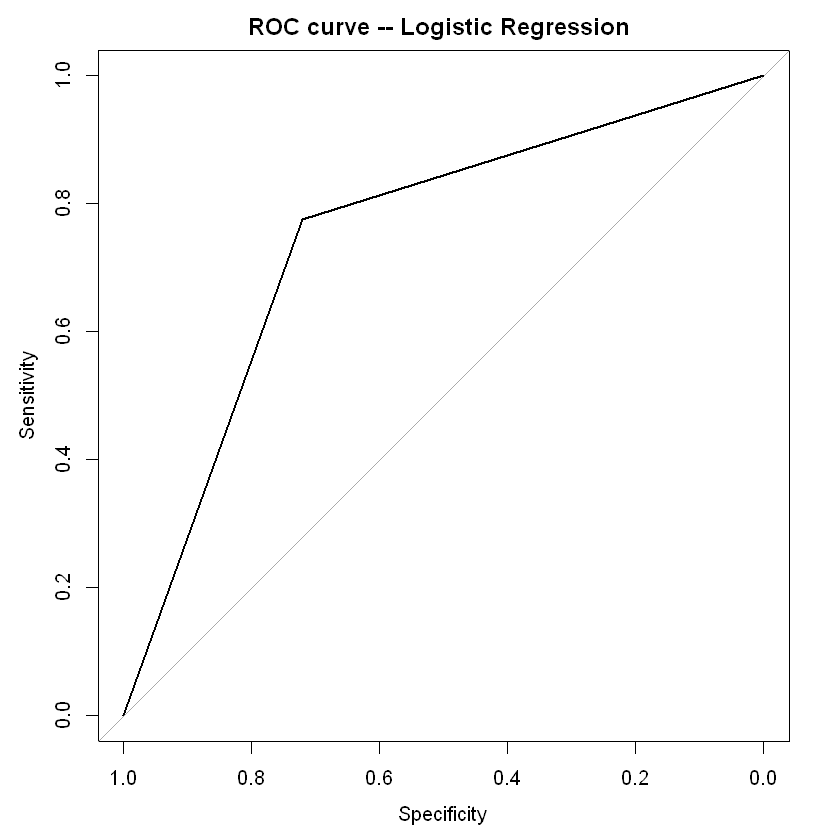


 Metric 4: Goodness-of-fit 
residual: 356196.3 
dof: 349238 
goodness-of-fit: 1.110223e-16
 Metric 5: QQ-norm 


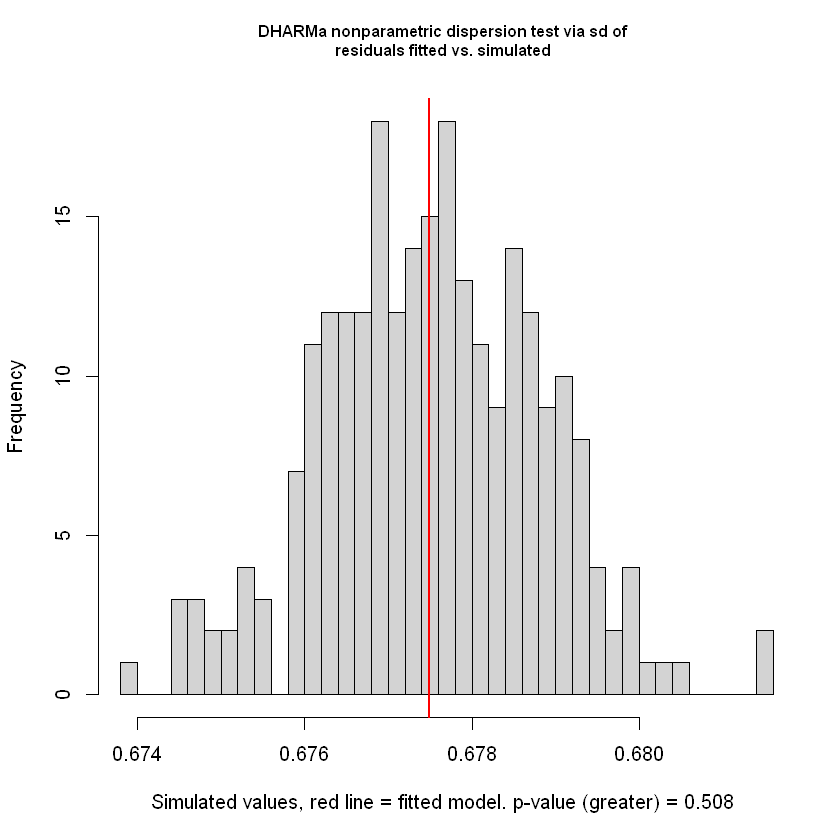

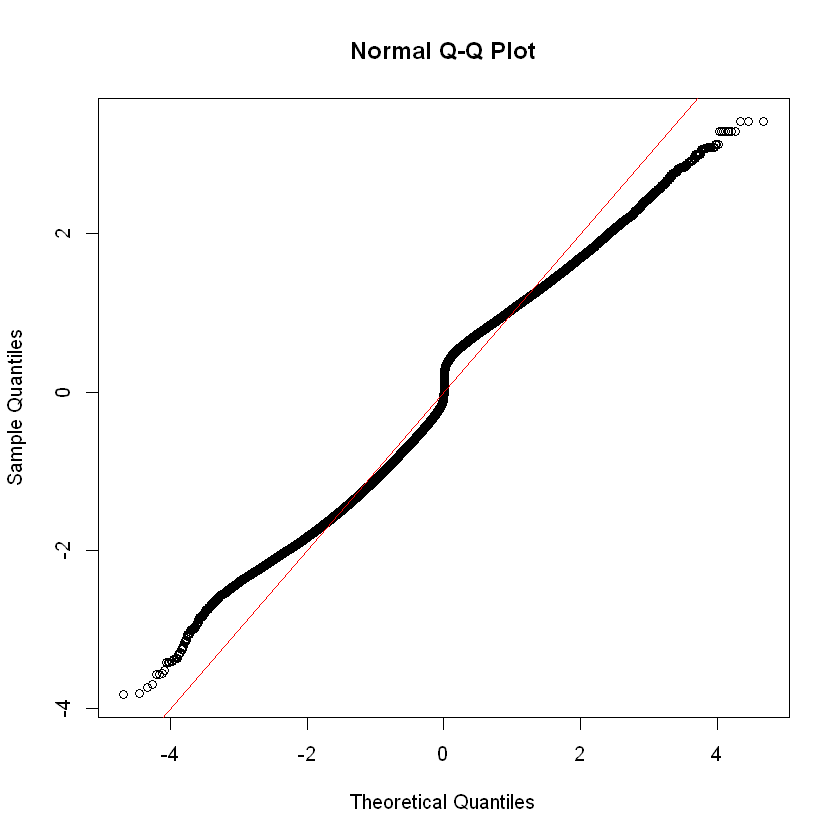

In [343]:
one_for_all_metric(logit_best_bic_model, balanced_training_data, "Diabetes_binary")


 Metric 1: ANOVA 

Call:
glm(formula = Diabetes_binary ~ HighBP + HighChol + CholCheck + 
    BMI + BMI_over_45 + Stroke + HeartDiseaseorAttack + PhysActivity + 
    Veggies + HvyAlcoholConsump + GenHlth + MentHlth + PhysHlth + 
    DiffWalk + Sex + Age + Education + Income, family = binomial(link = "logit"), 
    data = balanced_training_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.3543  -0.8106  -0.0818   0.8279   3.0678  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -2.292355   0.045336 -50.563  < 2e-16 ***
HighBP1                0.705718   0.008909  79.217  < 2e-16 ***
HighChol1              0.535973   0.008538  62.773  < 2e-16 ***
CholCheck1             1.298470   0.036491  35.583  < 2e-16 ***
BMI                    0.573039   0.005701 100.508  < 2e-16 ***
BMI_over_45           -0.894147   0.031005 -28.839  < 2e-16 ***
Stroke1                0.189410   0.018259  10.373  < 2e-16 ***
HeartDiseas

Setting levels: control = 0, case = 1

Setting direction: controls < cases



AUC:  0.7488101
 Metric 4: Overdispersion tests 


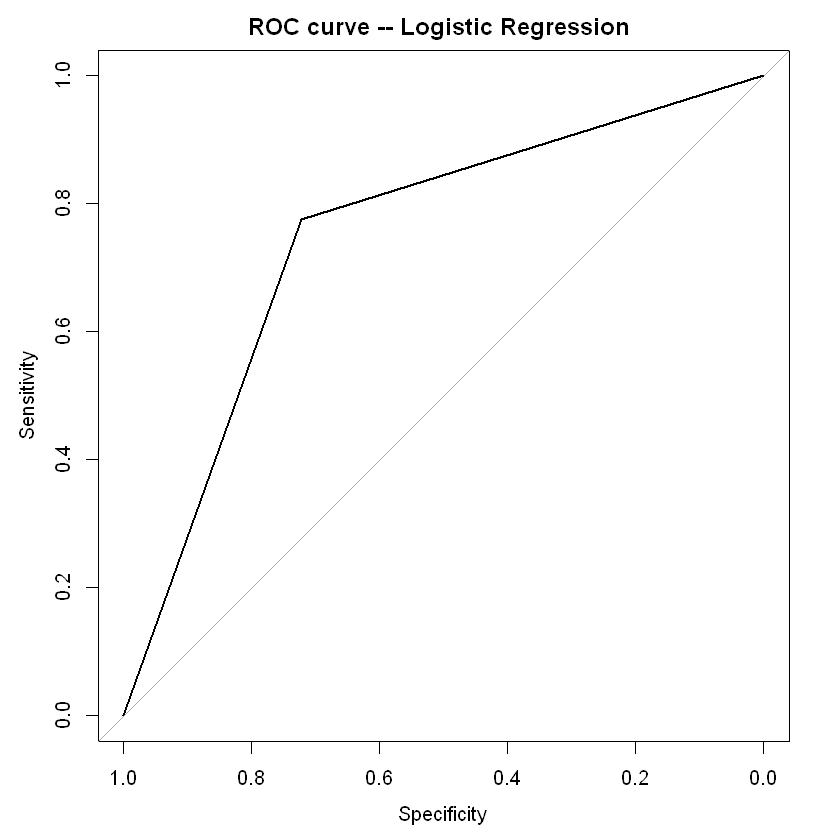


 Metric 4: Goodness-of-fit 
residual: 356196.3 
dof: 349238 
goodness-of-fit: 1.110223e-16
 Metric 5: QQ-norm 


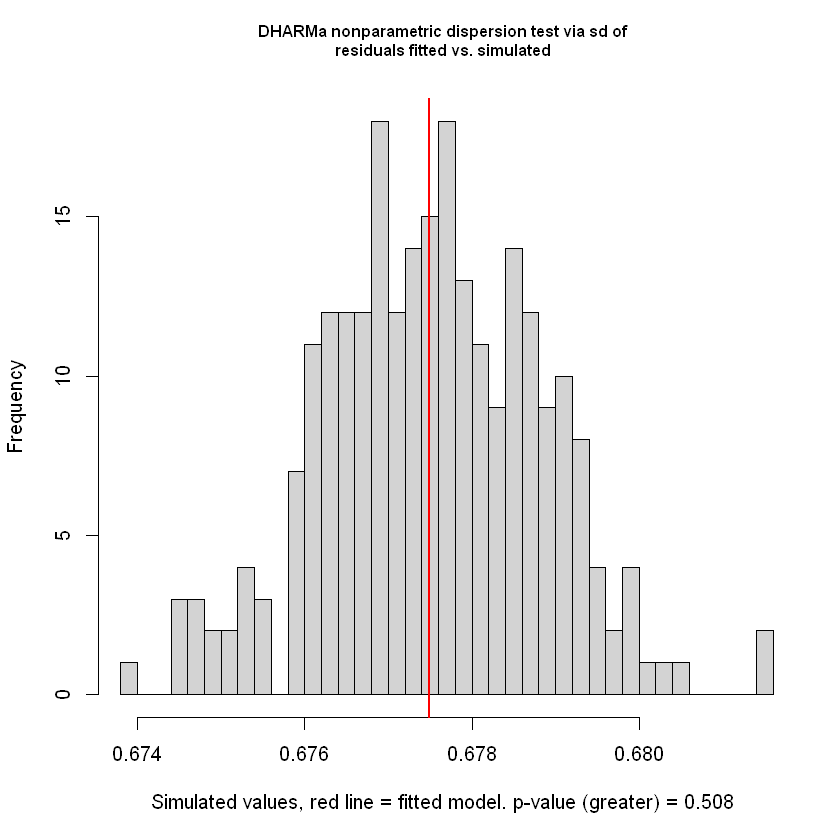

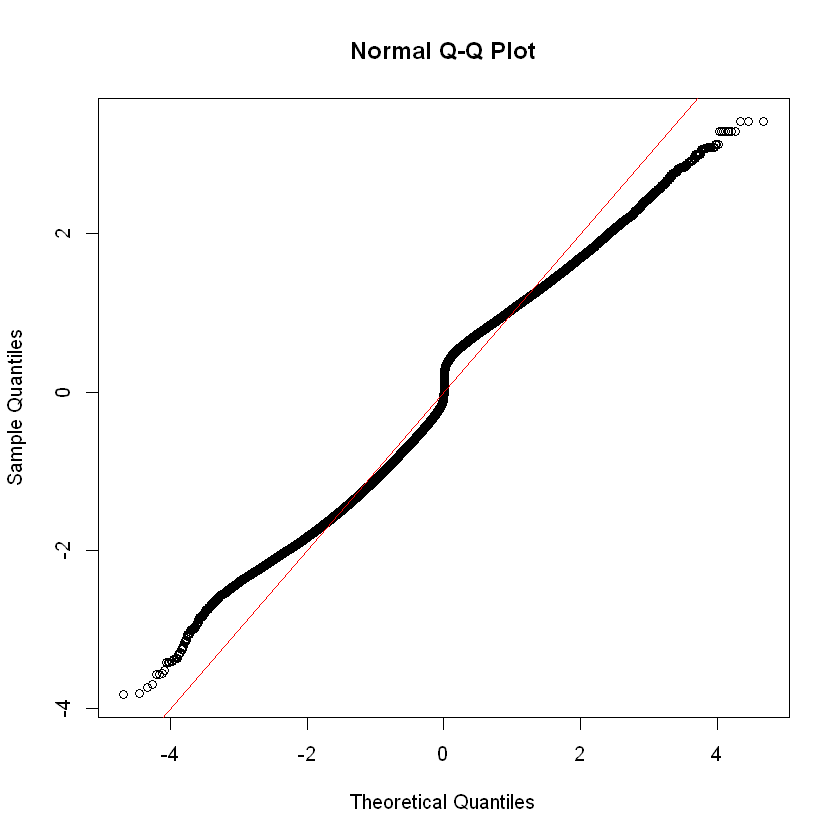

In [344]:
one_for_all_metric(logit_best_bic_model, balanced_testing_data, "Diabetes_binary")